# Phase 1: Problem Formulation & Data Understanding

## 1.1 PMSM Thermal Management

### 1.1.1 Context

Permanent Magnet Synchronous Motors (**PMSMs**) are widely used in electric vehicles, robotics and industrial automation due to their high efficiency and power density.

PMSMs in electric vehicles predominantly use neodymium-iron-boron (NdFeB) 
permanent magnets (**PMs**) due to their superior magnetic strength and cost-effectiveness 
compared to alternatives (samarium-cobalt, alnico, ferrite). However, NdFeB 
magnets are highly temperature-sensitive.

According to magnet manufacturer specifications, standard-grade neodymium magnets 
(N-series) experience irreversible demagnetization above 80°C, with high-temperature 
grades (SH, UH, AH) extending this threshold to 150-220°C at increased cost. 
Complete permanent loss occurs at the Curie temperature (>310°C). Resultantly, making 
accurate temperature monitoring is essential for safe operation.

### 1.1.2 Direct Measurement Constraints

Direct PM temperature measurement presents significant practical challenges. 
Rotor-mounted sensors require either slip ring assemblies (mechanical wear, 
maintenance issues) or wireless telemetry systems (power requirements, high cost). 
Both approaches add complexity to motor design and introduce additional failure 
modes. For mass-produced automotive applications, these 
constraints make direct measurement economically impractical, motivating 
ML-based prediction from operational parameters already measured by standard motor control systems (stator currents, voltages, motor speed, coolant temperature).

### 1.1.3 ML-Based Prediction Approach

Modern electric vehicle motor control systems continuously monitor these parameters for real-time operation and diagnostics. Beyond their primary function, the monitored values allow PM temperature inference through learned relationships, since PMSMs exhibit predictable thermal dynamics governed by power dissipation (copper losses, iron losses) and heat transfer mechanisms. Machine learning enables data-driven modeling of these thermal relationships without requiring detailed physical motor characterization or extensive calibration. Section 1.2 studies Paderborn University PMSM Dataset, which enabled such modelling in prior research.

## 1.2 Paderborn University PMSM Dataset

### 1.2.1 Overview

This analysis uses the publicly available PMSM temperature dataset collected by Paderborn University, widely adopted as a benchmark for thermal prediction research. The dataset comprises measurements from a German OEM prototype motor deployed on a controlled test bench, with the motor excited by hand-designed driving cycles representing various operational scenarios.

### 1.2.2 Characteristics

**Scale:** >1.3M measurements

**Temporal Structure:**  Comprises multiple measurement sessions (identified by profile_id), each representing a different driving cycle of 1-6 hours of continuous motor operation. Sessions are randomly arranged and have no temporal relationship to one another. Within each session, however, measurements are sequential and every recording is sampled at a fixed 2 Hz frequency, yielding dense time-series data.

**Varibles:**
- **ambient:** Ambient temperature (measured by thermal sensor near stator, in °C)
  
- **coolant:** Coolant temperature (water, measured at outlet, in °C)
  
- **u_d:** Voltage d-component (direct-axis voltage, in V)
  
- **u_q:** Voltage q-component (quadrature-axis voltage, in V)
  
- **motor_speed:** Motor rotational speed (in rpm)
  
- **torque:** Torque (in Nm)
  
- **i_d:** Current d-component (direct-axis current, in A)
  
- **i_q:** Current q-component (quadrature-axis current, in A)
  
- **pm:** Permanent magnet surface temperature (in °C)
  
- **stator_yoke:** Stator yoke temperature (in °C)
  
- **stator_tooth:** Stator tooth temperature (in °C)
  
- **stator_winding:** Stator winding temperature (in °C)
  
- **profile_id:** Identifier for different measurement sessions

### 1.2.3 Dataset Suitability

Several key characteristics motivated 
the selection of this dataset for our investigation:

**Large scale (>1.3M measurements):** 
Provides sufficient training data even after significant downsampling. For 
example, reducing from native 2 Hz to 60-second intervals (120 x reduction) 
still yields over 10.000 samples, enabling robust model evaluation 
across the full frequency range.

**Dense native sampling (2 Hz):** 
The fine baseline temporal resolution allows systematic downsampling over a vast range of measurement frequencies. These frequencies, in turn, correspond to a wide spectrum of embedded motor control applications, from real-time protection to long-term condition monitoring. This enables us to evaluate the suitability of our ML models for solving many embedding challenges faced by PMSMs today.

**Diverse operating conditions:**
The dataset captures varied speeds, torques, thermal states, and driving cycles, 
providing comprehensive coverage of the operational space encountered in real-world deployment. 
This diversity supports generalization by 
reducing the likelihood that deployment scenarios fall outside the training 
distribution.

**Preserved temporal ordering:** 
Measurements within each session maintain their original temporal sequence, 
enabling the creation of lag features that capture thermal inertia effects.

**Comprehensive variable coverage:** 
The inclusion of operational parameters, environmental conditions, and motor temperatures enables comprehensive investigations of different virtual sensing configurations, from hybrid approaches (using stator sensors) to pure virtual sensing (no internal temperature sensors).

**Established baseline:** 
Prior work demonstrates >99% baseline prediction accuracy on this dataset, confirming 
data quality and providing a strong onset for measuring performance 
degradation under sparse sampling conditions.

**High-quality measurements:**
The controlled test-bench environment ensures consistent, low-noise measurements 
across all sensors. This data quality enables clear assessment of model 
limitations (underfitting/overfitting).

## 1.3 Investigation Scope

### 1.3.1 Addressing Embedded Deployment Constraints

While prior work on the Paderborn PMSM dataset demonstrates excellent prediction accuracy (R² > 99%) at native 2 Hz sampling, no systematic investigation has characterized performance across reduced sampling frequencies. Addressing this gap would be worthwhile, as practical embedded deployment faces multiple constraints that create tradeoffs between prediction accuracy and system resources:

1. **Computational load:** Motor control units must balance real-time control loops, communication protocols, and diagnostic functions within finite processing capabilities.
   
2. **Power consumption:** Continuous sensor polling and data acquisition consume auxiliary power.

3. **Thermal dynamics:** Motor temperature changes occur over timescales of 
tens of seconds to minutes, significantly slower than electrical dynamics 
(milliseconds), suggesting high-frequency sampling may provide diminishing 
returns.

These constraints motivate investigation of whether prediction accuracy can be maintained at significantly reduced sensing frequencies, enabling deployment on cost-effective, resource-constrained motor control hardware.

**This project investigates ML-based prediction as a virtual sensor using operational parameters already measured by standard motor control systems (currents, voltages, speed, torque, coolant) and stator thermal measurements to substitute rotor-mounted PM temperature sensors. The scope subsequently extends to comprehensive thermal monitoring, where all motor temperatures are predicted from operational parameters alone, eliminating the need for any thermal sensors. The investigation addresses progressively sparser sensing frequencies (1-60 seconds), providing practical guidance for embedded deployment scenarios where computational and power constraints necessitate reduced sampling rates**

### 1.3.2 Investigation Approach

**Baseline establishment:** Develop a linear regression model at native sampling 
frequency (2 Hz) to establish prediction capability and identify key features driving 
PM temperature evolution. The model will use the variable 'pm' as target and all the others except 'profile_id' (variable used for dataset organization only) as input features.

**Sparse sampling analysis:** Systematically evaluate model performance across 
reduced sampling frequencies (1-60 seconds) to characterize the accuracy-sampling 
tradeoff and identify viable rates for embedded deployment.

**Model validation:** Validate findings against XGBoost, an industry-standard 
gradient boosting method that we will employ as a benchmark.

**Extended functionality exploration:** Investigate the tradeoff between sensor elimination and prediction accuracy for cost-sensitive applications by using multi-output neural networks to predict all motor temperatures from operational parameters (current, voltage, speed, torque), environmental conditions (coolant, ambient), and temporal features (previous predictions).

**Supporting analyses:** Throughout the investigation, additional analyses emerge organically as patterns develop. These include feature importance assessment through ablation studies, error characterization to validate model behavior, and deployment feasibility assessment for embedded hardware by measuring inference time and memory requirements. These supporting investigations provide depth and practical validation.

# Phase 2: Methodology

## 2.1 Data preprocessing

### 2.1.1 Dataset Inspection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

In [2]:
df=pd.read_csv('measures_v2.csv')

In [3]:
df.shape

(1330816, 13)

In [4]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth', 'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque', 'profile_id'], dtype='object')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB
None


In [6]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [7]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicates")
    print(f"New shape: {df.shape}")

Duplicate rows: 0


In [8]:
missing = df.isna().sum()
print("Missing values per column:")
print(missing[missing > 0])

Missing values per column:
Series([], dtype: int64)


In [9]:
n_sessions = df['profile_id'].nunique()
print(f"Number of measurement sessions: {n_sessions}")
print("\nSession sizes:")
print(df['profile_id'].value_counts().sort_index())

Number of measurement sessions: 69

Session sizes:
profile_id
2     19357
3     19248
4     33424
5     14788
6     40388
      ...  
76    22188
78     8445
79    31154
80    23824
81    17672
Name: count, Length: 69, dtype: int64


<div style="text-align: center; margin-bottom: 10px; margin-top:20px">
    <strong style="font-size: 14px;">Figure 1: Permanent Magnet Temperature Distribution</strong>
</div>

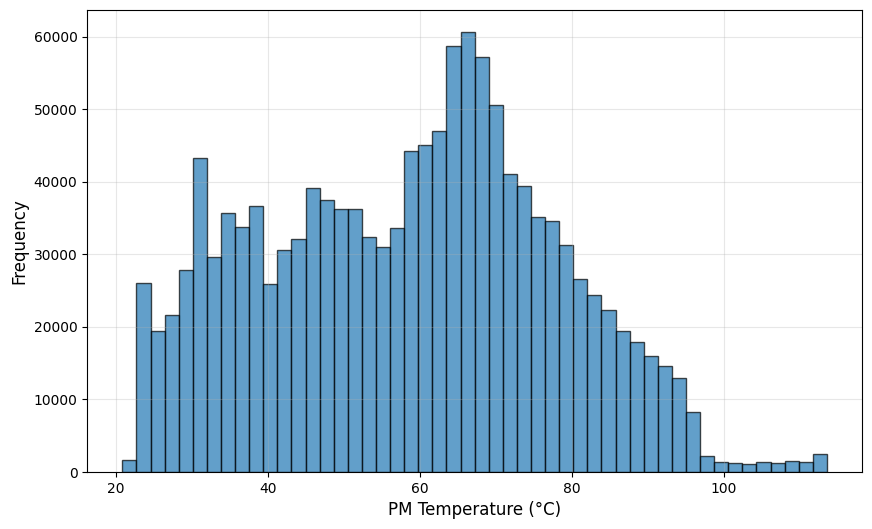

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['pm'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('PM Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

The temperature distribution reflects well-designed test protocols: the motor 
operates primarily in safe thermal ranges with occasional excursions to higher 
temperatures, consistent with realistic driving cycles where 
overheating is an uncommon occurance.

### 2.1.2 Temporal Feature Engineering

**Motor temperature exhibits strong temporal dependence due to thermal inertia.** 
Temperature changes occur over timescales of seconds to minutes, significantly slower than the electrical dynamics of the motor (milliseconds). Consequently, temperature at time t depends primarily on recent thermal history rather than responding instantaneously to changes in operational parameters.

This observation is important enough to motivate the creation of a new feature: pm_lag1, representing the temperature of the PM recorded during the previous sample. Implicitly, the first measurement in each session will be discarded, as we lack preceding thermal history. Starting from the second sample, each one uses the prediction made at the previous timestep (pm) as its lag feature (pm_lag1).

In [11]:
df['pm_lag1'] = df.groupby('profile_id')['pm'].shift(1)
df = df.dropna(subset=['pm_lag1'])

Temperature at time t+1 is best predicted from temperature at time t, and its rate of change
is determined by current operational conditions (current, speed, torque, cooling).

This transforms the prediction task from "predict absolute temperature from 
operating conditions" (physically infeasible without thermal history, we will prove this during the feature ablation study) to 
"predict temperature evolution from current thermal state and operating 
conditions" (physically meaningful).

**Feature Requirements**

1. Temporal ordering of measurements

To contribute meaningfully to the prediction model, pm_lag1 requires temporal ordering of measurements, as shuffling would destroy the feature's predictive value by replacing actual thermal history with random, unrelated temperature values from different timesteps and driving contexts.

2. Initialization strategy for deployment

In deployment, the first measurement taken each time the motor is started requires a value to be assigned to pm_lag1, as no prior thermal history exists. The optimal initialization strategy depends on the specific application context:

- Real-time protection: Estimate from stator/coolant temperatures
  
- Post-shutdown restart: Model thermal decay since last operation
  
- Cold start: Initialize at ambient temperature

- Condition monitoring: Precise initialization less critical due to long-term trend focus rather than real-time protection

This initialization challenge is inherent to any temporal prediction approach and would require motor-specific calibration during system integration.

### 2.1.3 Train/Test Split Strategy

The dataset comprises 69 independent measurement sessions, each representing 
a distinct driving cycle. We employ a sequential split:

- **Training set:** Sessions 1-48 (70% of sessions)
  
- **Test set:** Sessions 49-69 (30% of sessions)

In [12]:
X_train = df[['motor_speed', 'torque', 'i_d', 'i_q', 'u_d', 'u_q', 
        'coolant', 'ambient', 'stator_yoke', 'stator_tooth', 
        'stator_winding', 'pm_lag1']][df['profile_id']<49]
y_train = df[['pm']][df['profile_id']<49]
X_test = df[['motor_speed', 'torque', 'i_d', 'i_q', 'u_d', 'u_q', 
        'coolant', 'ambient', 'stator_yoke', 'stator_tooth', 
        'stator_winding', 'pm_lag1']][df['profile_id']>=49]
y_test = df[['pm']][df['profile_id']>=49]

The split proportions (first 70/last 30) follow standard practice. With 69 independent sessions, the Law of Large Numbers ensures that the test set will statistically represent similar operational diversity as the training set, avoiding both the extremes of testing only on a narrow subset of conditions or requiring extrapolation to unseen operating regimes. The following hexbin graphs prove the assumption:

<div style="text-align: center; margin-bottom: 10px; margin-top:20px">
    <strong style="font-size: 14px;">Figure 2: Operating Envelope Comparison</strong>
</div>

<div style="text-align: center; font-style: italic;">
    Hexbin density visualization of the training and test set across the speed-torque operating space.
</div>

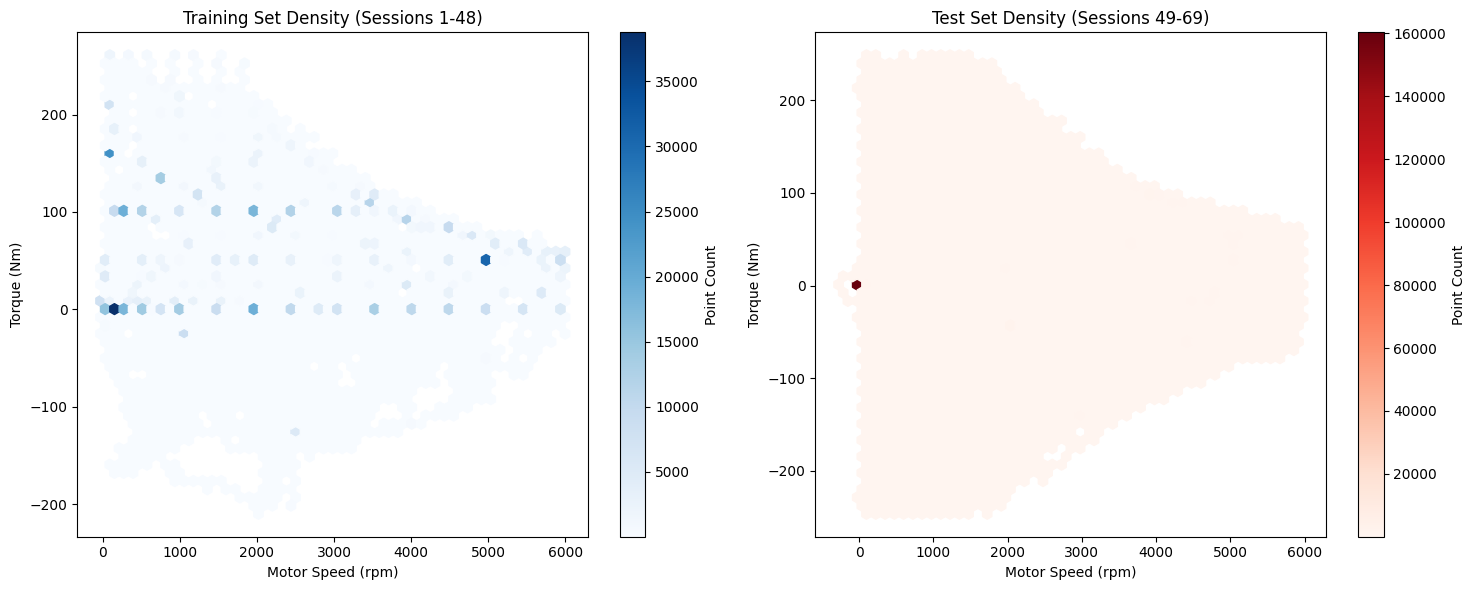

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

hb1 = axes[0].hexbin(X_train['motor_speed'], X_train['torque'], 
                     gridsize=50, cmap='Blues', mincnt=1)
axes[0].set_xlabel('Motor Speed (rpm)')
axes[0].set_ylabel('Torque (Nm)')
axes[0].set_title('Training Set Density (Sessions 1-48)')
fig.colorbar(hb1, ax=axes[0], label='Point Count')

hb2 = axes[1].hexbin(X_test['motor_speed'], X_test['torque'], 
                     gridsize=50, cmap='Reds', mincnt=1)
axes[1].set_xlabel('Motor Speed (rpm)')
axes[1].set_ylabel('Torque (Nm)')
axes[1].set_title('Test Set Density (Sessions 49-69)')
fig.colorbar(hb2, ax=axes[1], label='Point Count')

plt.tight_layout()
plt.show()

### 2.1.4 Data Normalization

Features in the dataset span different physical units and scales, ranging from temperatures in tens of degrees Celsius to currents/voltages in hundreds of amperes/volts and motor speeds in thousands of RPM. To ensure all features contribute meaningfully to the model and enable fair coefficient comparison, we apply standardization using scikit-learn's StandardScaler.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

This transforms each feature to zero mean and unit variance, which is standard practice in machine learning, to ensure comparable scales across all input variables. To prevent data leakage, normalization is performed after the train/test split: the scaler is fit only on training data, then applied to both sets.

## 2.2 Baseline Linear Regression Model

### 2.2.1 Model Training and Testing

We first establish a baseline using the 2 Hz sampling frequency of the original dataset, which also serves to confirm the high performance results commonly reported in PMSM thermal modeling literature: At high data sampling frequencies, ML models predict the temperature of the PM with an accuracy of over 99%

To enable deployment feasibility assessment in Section 2.7, we establish an infrastructure to measure the inference time and memory requirements of the most significant models trained throughout the project. The following cell initializes a tracking system, which operates silently during subsequent model training.

In [15]:
import pandas as pd
import time
import os

COST_CSV = 'computational_cost_analysis.csv'

if not os.path.exists(COST_CSV):
    costs_df = pd.DataFrame(columns=[
        'model_type',
        'interval', 
        'architecture',
        'inference_time_us',
        'throughput_per_sec',
        'model_size_kb'
    ])
    costs_df.to_csv(COST_CSV, index=False)
    print(f"✓ Created '{COST_CSV}'")
else:
    print(f"✓ Found existing '{COST_CSV}'")
    costs_df = pd.read_csv(COST_CSV)
    print(f"  Contains {len(costs_df)} measurements")
    
def add_computational_cost(model, X_sample, model_type, interval, architecture='-', n_iterations=1000):

    start = time.perf_counter()
    for _ in range(n_iterations):
        if hasattr(model, 'predict'):
            _ = model.predict(X_sample, verbose=0) if 'verbose' in str(model.predict.__code__.co_varnames) else model.predict(X_sample)
    end = time.perf_counter()
    
    inference_time_us = (end - start) / n_iterations * 1e6  # microseconds
    throughput = 1e6 / inference_time_us
    
    new_row = pd.DataFrame([{
        'model_type': model_type,
        'interval': interval,
        'architecture': architecture,
        'inference_time_us': inference_time_us,
        'throughput_per_sec': throughput,
        'model_size_kb': None
    }])
    
    existing = pd.read_csv(COST_CSV)
    duplicate = existing[
        (existing['model_type'] == model_type) & 
        (existing['interval'] == interval) & 
        (existing['architecture'] == architecture)
    ]
    
    if len(duplicate) > 0:
        print(f"  ⚠ Measurement already exists for {model_type} ({interval}) - skipping")
        return
    
    new_row.to_csv(COST_CSV, mode='a', header=False, index=False)
    
    print(f"  ✓ {model_type} ({interval}): {inference_time_us:.2f} μs/prediction ({throughput:.0f} pred/s)")

print("\n✓ Computational cost tracking initialized")

✓ Found existing 'computational_cost_analysis.csv'
  Contains 18 measurements

✓ Computational cost tracking initialized


In [16]:
from sklearn.linear_model import LinearRegression

model_2hz = LinearRegression()
model_2hz.fit(X_train_scaled, y_train)
y_pred = model_2hz.predict(X_test_scaled)

coefficients = pd.DataFrame({
    'feature': X_train.columns.tolist(),
    'coefficient': model_2hz.coef_.flatten()
})

coefficients['abs_coefficient'] = coefficients['coefficient'].abs()
coefficients = coefficients.sort_values('abs_coefficient', ascending=False)

X_sample = X_test_scaled[0:1]
add_computational_cost(
    model=model_2hz,
    X_sample=X_sample,
    model_type="Linear Regression",
    interval="0.5s",
    architecture="-"
)
print()

print("\nFeature Coefficients (sorted by importance):")
print(coefficients[['feature', 'coefficient']].to_string(index=False))

  ⚠ Measurement already exists for Linear Regression (0.5s) - skipping


Feature Coefficients (sorted by importance):
       feature  coefficient
       pm_lag1    20.900242
  stator_tooth    -0.029213
stator_winding     0.027671
        torque    -0.020691
           i_q     0.015935
       coolant     0.005877
   motor_speed     0.005065
           u_d    -0.004970
           i_d    -0.004656
   stator_yoke     0.004013
           u_q    -0.003156
       ambient     0.000673


In [17]:
from sklearn.metrics import r2_score, mean_absolute_error

print(f"Baseline Linear Regression:")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}°C")

Baseline Linear Regression:
R²: 0.9999
MAE: 0.0559°C


The baseline model achieves R² = 0.99 on the test set, which is consistent with literature reports on high-frequency PMSM thermal modelling. While the large coefficient of pm_lag1 (20.9) suggests thermal inertia dominates the prediction, coefficient magnitudes alone can be misleading in the presence of correlated features. To rigorously quantify the relative importance of different physical phenomena, we perform a feature ablation study.

### 2.2.2 Feature Ablation Study

Feature ablation systematically removes groups of features representing distinct thermal mechanisms (heat generation, heat removal, thermal inertia, thermal coupling) and measures the impact on prediction performance. This evaluates our physical interpretation and provides quantitative understanding of which phenomena drive temperature evolution.

**Method:**

We group features by physical meaning:
- Thermal inertia: lag feature pm_lag1
- Heat removal: environmental features (coolant, ambient temperature)  
- Heat generation (mechanical): motor speed, torque
- Heat generation (electrical): d-q axis currents and voltages
- Thermal coupling (stator temperatures)

For each group, we remove all associated features, retrain the linear regression 
model, and evaluate performance on the test set.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

features_all = ['pm_lag1', 'stator_winding', 'stator_tooth', 'stator_yoke',
                'i_d', 'i_q', 'u_d', 'u_q', 'motor_speed', 'torque', 'coolant', 'ambient']

feature_groups = {
    'Baseline (All)': features_all,
    'No Thermal Inertia (PM)': ['i_d', 'i_q', 'u_d', 'u_q', 'motor_speed', 'torque', 'coolant', 'ambient', 'stator_winding', 'stator_tooth', 'stator_yoke'],
    'No Cooling': ['pm_lag1', 'i_d', 'i_q', 'u_d', 'u_q', 'motor_speed', 'torque', 'stator_winding', 'stator_tooth', 'stator_yoke'],
    'No Mechanical': ['pm_lag1', 'stator_winding', 'stator_tooth', 'stator_yoke', 'i_d', 'i_q', 'u_d', 'u_q', 'coolant', 'ambient'],
    'No Electrical': ['pm_lag1', 'stator_winding', 'stator_tooth', 'stator_yoke', 'motor_speed', 'torque', 'coolant', 'ambient'],
    'No Stator Temperatures': ['pm_lag1', 'i_d', 'i_q', 'u_d', 'u_q', 'motor_speed', 'torque', 'coolant', 'ambient']
}

results = {}

for name, features in feature_groups.items():
    model = LinearRegression()
    model.fit(X_train_scaled_df[features], y_train)
    y_pred = model.predict(X_test_scaled_df[features])
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {'R2': r2, 'MAE': mae}

groups = list(results.keys())
r2_values = [results[g]['R2'] for g in groups]
mae_values = [results[g]['MAE'] for g in groups]

baseline_r2 = results['Baseline (All)']['R2']
baseline_mae = results['Baseline (All)']['MAE']

for name in groups:
    r2 = results[name]['R2']
    mae = results[name]['MAE']
    r2_drop = baseline_r2 - r2
    mae_increase = mae - baseline_mae
    print(f"{name:25s} | R²: {r2:.6f} ({r2_drop:+.6f}) | MAE: {mae:.4f}°C ({mae_increase:+.4f}°C)")

Baseline (All)            | R²: 0.999921 (+0.000000) | MAE: 0.0559°C (+0.0000°C)
No Thermal Inertia (PM)   | R²: 0.585466 (+0.414455) | MAE: 6.6824°C (+6.6265°C)
No Cooling                | R²: 0.999921 (-0.000000) | MAE: 0.0558°C (-0.0001°C)
No Mechanical             | R²: 0.999921 (+0.000000) | MAE: 0.0559°C (+0.0001°C)
No Electrical             | R²: 0.999921 (+0.000000) | MAE: 0.0563°C (+0.0004°C)
No Stator Temperatures    | R²: 0.999921 (-0.000000) | MAE: 0.0558°C (-0.0001°C)


<div style="text-align: center; margin-bottom: 10px; margin-top:20px">
    <strong style="font-size: 14px;">Figure 3: Model Performance and Prediction Error in Feature Ablation Study</strong>
</div>

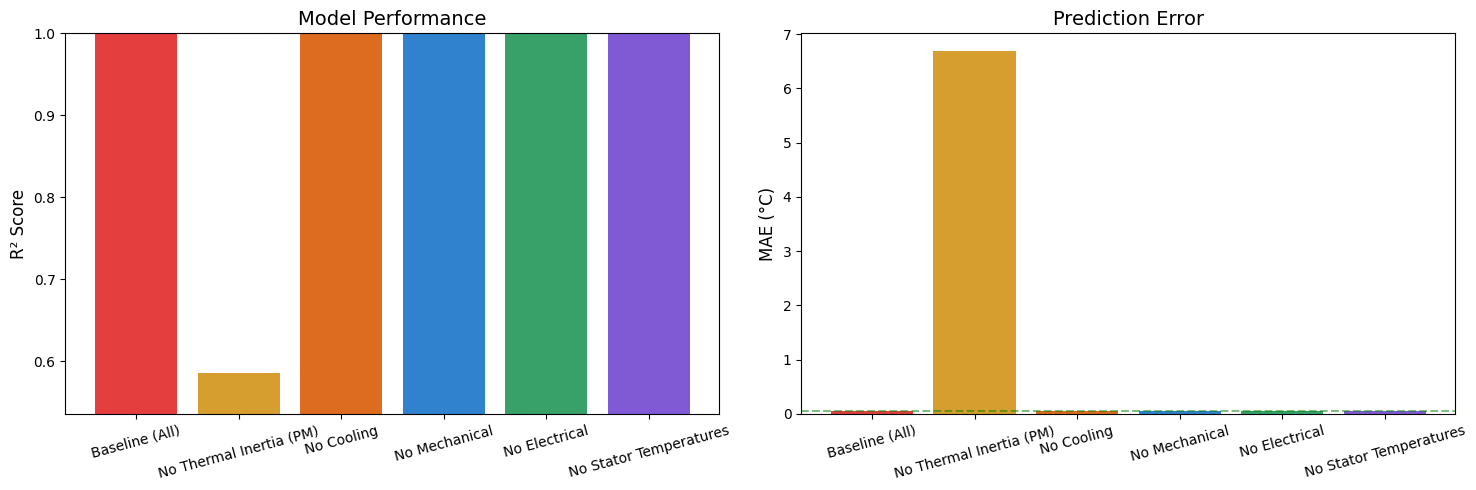

In [19]:
colors = ['#e53e3e', '#d69e2e', '#dd6b20', '#3182ce', '#38a169', '#805ad5']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(groups, r2_values, color=colors)
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_title('Model Performance', fontsize=14)
ax1.set_ylim([min(r2_values) - 0.05, 1.0])
ax1.axhline(y=results['Baseline (All)']['R2'], color='green', linestyle='--', alpha=0.5)
ax1.tick_params(axis='x', rotation=15)

ax2.bar(groups, mae_values, color=colors)
ax2.set_ylabel('MAE (°C)', fontsize=12)
ax2.set_title('Prediction Error', fontsize=14)
ax2.axhline(y=results['Baseline (All)']['MAE'], color='green', linestyle='--', alpha=0.5)
ax2.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

**Conclusion:** Feature ablation demonstrates that pm_lag1 is the dominant predictor, accounting for the vast majority of model performance. Removing pm_lag1 causes catastrophic  degradation of R², while removing any other feature group has negligible impact.

The exceptional prediction accuracy at the native 2Hz sampling rate does not guarantee similar results at the reduced sampling rates required for embedded deployment. However, the high baseline accuracy provides headroom for expected performance degradation at sparse sampling intervals. Section 2.3 investigates whether this accuracy margin is sufficient to maintain practical performance across deployment-relevant sampling frequencies.

## 2.3 Impact of the Sampling Frequency on Model Performance

### 2.3.1 Motivation

As established in Section 1.3.1, embedded deployment scenarios face constraints that make higher-frequency sampling challenging: computational load in real-time control loops, power consumption from continuous sensor polling, and the mismatch between thermal dynamics and electrical dynamics.

We investigate whether the baseline model's excellent performance (R² = 0.9999 at 2 Hz) can be maintained at lower sampling frequencies. Specifically, we test the following frequencies:


- **1 Hz (1s):** Minimal reduction from baseline, tests sensitivity to sparse sampling

- **0.5 Hz (2s):** Moderate reduction, still well above thermal sensor response times

- **0.2 Hz (5s):** Aligned with typical thermal sensor response time (1-5s) and fast industrial monitoring

- **0.1 Hz (10s):** Matches thermal process timescales (temperature changes of 1-5°C per second translate to meaningful deltas at 10s intervals)

- **0.05 Hz (20s):** Sparse sampling approaching thermal inertia limits

- **0.033 Hz (30s):** Extended interval testing degradation mechanisms

- **0.017 Hz (60s):** Aligned with industrial temperature monitoring for predictive maintenance, where systems typically sample every 15-60 seconds

### 2.3.2 Sequential Model Training and Testing

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Since the default sampling is at every 0.5s, we increase the interval by 2 for another second in between 2 measurements 
intervals = [2,4,10,20,40,60,120]
results = []
df=pd.read_csv('measures_v2.csv')

for interval in intervals:

    df_sparse = df.iloc[::interval].copy().reset_index(drop=True)
    
    df_sparse['pm_lag1'] = df_sparse.groupby('profile_id')['pm'].shift(1)
    df_sparse = df_sparse.dropna()
    
    X = df_sparse[['motor_speed', 'torque', 'i_d', 'i_q', 'u_d', 'u_q',
                    'coolant', 'ambient', 'stator_yoke', 'stator_tooth',
                    'stator_winding', 'pm_lag1']]
    y = df_sparse['pm']
    
    n = len(df_sparse)
    train_end = int(0.7 * n)
    X_train, y_train = X.iloc[:train_end], y.iloc[:train_end]
    X_test, y_test = X.iloc[train_end:], y.iloc[train_end:]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    pm_lag1_idx = list(X.columns).index('pm_lag1')
    pm_lag1_coef = model.coef_[pm_lag1_idx]

    X_sample = X_test_scaled[0:1]
    add_computational_cost(
        model=model,
        X_sample=X_sample,
        model_type="Linear Regression (Sparse)",
        interval=f"{interval/2}s",
        architecture="-"
    )
    print()
    
    results.append({
        'interval_timesteps': interval,
        'interval_seconds': interval * 0.5,
        'r2': r2,
        'mae': mae,
        'pm_lag1_coef': pm_lag1_coef,
        'n_samples': len(df_sparse)
    })
    

results_df = pd.DataFrame(results)
print(results_df)

  ⚠ Measurement already exists for Linear Regression (Sparse) (1.0s) - skipping

  ⚠ Measurement already exists for Linear Regression (Sparse) (2.0s) - skipping

  ⚠ Measurement already exists for Linear Regression (Sparse) (5.0s) - skipping

  ⚠ Measurement already exists for Linear Regression (Sparse) (10.0s) - skipping

  ⚠ Measurement already exists for Linear Regression (Sparse) (20.0s) - skipping

  ⚠ Measurement already exists for Linear Regression (Sparse) (30.0s) - skipping

  ⚠ Measurement already exists for Linear Regression (Sparse) (60.0s) - skipping

   interval_timesteps  interval_seconds        r2       mae  pm_lag1_coef  n_samples
0                   2               1.0  0.999872  0.073691     20.272930     665339
1                   4               2.0  0.999782  0.102171     20.249401     332635
2                  10               5.0  0.999706  0.130503     20.184456     133013
3                  20              10.0  0.999658  0.156216     20.082890      66472
4   

<div style="text-align: center; margin-bottom: 10px; margin-top:20px">
    <strong style="font-size: 14px;">Figure 4: Impact of Sampling Frequency on Model Characteristics</strong>
</div>

<div style="text-align: center; font-style: italic;">
    Prediction accuracy and thermal inertia dependence across sampling frequencies
</div>

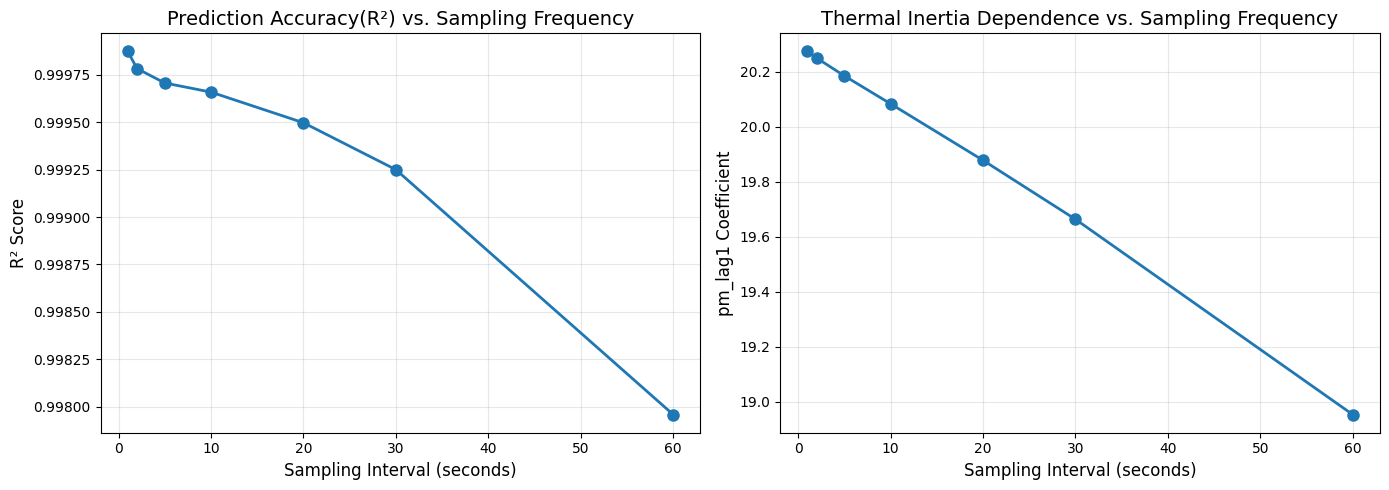

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(results_df['interval_seconds'], results_df['r2'], 'o-', linewidth=2, markersize=8)
ax1.set_xlabel('Sampling Interval (seconds)', fontsize=12)
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_title('Prediction Accuracy(R²) vs. Sampling Frequency', fontsize=14)
ax1.grid(True, alpha=0.3)

ax2.plot(results_df['interval_seconds'], results_df['pm_lag1_coef'], 'o-', linewidth=2, markersize=8)
ax2.set_xlabel('Sampling Interval (seconds)', fontsize=12)
ax2.set_ylabel('pm_lag1 Coefficient', fontsize=12)
ax2.set_title('Thermal Inertia Dependence vs. Sampling Frequency', fontsize=14)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The model achieves gracefully degrading performance (R²) over progressively longer sampling intervals. This demonstrates the viability of the ML based prediction as a virtual sensor applied in diverse embedded deployment scenarios. Correspondingly, the pm_lag1 coefficient decreases as sampling intervals increase, reflecting reduced thermal inertia dominance as prior temperature measurements provide increasingly stale thermal history information.

**Conclusion**:
The robust performance at sparse sampling frequencies (R² > 0.997 through 60s intervals) demonstrates that ML-based PM temperature 
prediction remains viable across the spectrum of embedded motor control applications, from real-time protection to long-term condition monitoring.

## 2.4: Non-Linear Model Comparison

### 2.4.1 Motivation

Linear regression demonstrates excellent performance across sparse sampling frequencies, suggesting that PM temperature prediction is fundamentally a 
linear problem when thermal history is available. To validate this finding, we compare against XGBoost (Extreme Gradient Boosting), a state-of-the-art method, widely recognized for superior performance on tabular data across diverse machine learning applications.

XGBoost's ability to capture non-linear relationships and feature interactions makes it an ideal validation benchmark. **If linear regression performs comparably to XGBoost, this confirms that model simplicity is not sacrificing accuracy and that the problem is genuinely linear.**

### 2.4.2 Benchmark Model Training

In [22]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

intervals_to_test = [10, 20, 40, 60, 120]
comparison_results = []

for interval in intervals_to_test:

    df_sparse = df.iloc[::interval].copy().reset_index(drop=True)
    df_sparse['pm_lag1'] = df_sparse.groupby('profile_id')['pm'].shift(1)
    df_sparse = df_sparse.dropna()
    
    X = df_sparse[['motor_speed', 'torque', 'i_d', 'i_q', 'u_d', 'u_q',
                    'coolant', 'ambient', 'stator_yoke', 'stator_tooth',
                    'stator_winding', 'pm_lag1']]
    y = df_sparse['pm']
    
    n = len(df_sparse)
    train_end = int(0.7 * n)
    X_train, y_train = X.iloc[:train_end], y.iloc[:train_end]
    X_test, y_test = X.iloc[train_end:], y.iloc[train_end:]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model_lr = LinearRegression()
    model_lr.fit(X_train_scaled, y_train)
    y_pred_lr = model_lr.predict(X_test_scaled)
    r2_lr = r2_score(y_test, y_pred_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    
    model_xgb = XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        verbosity=0
    )
    model_xgb.fit(X_train_scaled, y_train)
    y_pred_xgb = model_xgb.predict(X_test_scaled)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

    if interval == 60:
        import joblib
        os.makedirs('models', exist_ok=True)
        joblib.dump(model_xgb, 'models/xgb_60s.pkl')
    
    X_sample = X_test_scaled[0:1]
    add_computational_cost(
        model=model_xgb,
        X_sample=X_sample,
        model_type="XGBoost",
        interval=f"{interval/2}s",
        architecture="-"
    )
    print()

    comparison_results.append({
        'interval_seconds': interval * 0.5,
        'r2_linear': r2_lr,
        'mae_linear': mae_lr,
        'r2_xgboost': r2_xgb,
        'mae_xgboost': mae_xgb,
        'improvement_r2': r2_xgb - r2_lr,
        'improvement_mae': mae_lr - mae_xgb
    })

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)

  ⚠ Measurement already exists for XGBoost (5.0s) - skipping

  ⚠ Measurement already exists for XGBoost (10.0s) - skipping

  ⚠ Measurement already exists for XGBoost (20.0s) - skipping

  ⚠ Measurement already exists for XGBoost (30.0s) - skipping

  ⚠ Measurement already exists for XGBoost (60.0s) - skipping

   interval_seconds  r2_linear  mae_linear  r2_xgboost  mae_xgboost  improvement_r2  improvement_mae
0               5.0   0.999706    0.130503    0.999657     0.161805       -0.000049        -0.031302
1              10.0   0.999658    0.156216    0.999620     0.174992       -0.000037        -0.018776
2              20.0   0.999496    0.215727    0.999464     0.220016       -0.000032        -0.004289
3              30.0   0.999249    0.275984    0.999229     0.273476       -0.000020         0.002508
4              60.0   0.997960    0.472341    0.998071     0.445596        0.000111         0.026745


<div style="text-align: center; margin-bottom: 10px; margin-top:20px">
    <strong style="font-size: 14px;">Figure 5: XGBoost and Linear Regression Model Comparison</strong>
</div>

<div style="text-align: center; font-style: italic;">
    Prediction accuracy and improvement across sampling frequencies
</div>

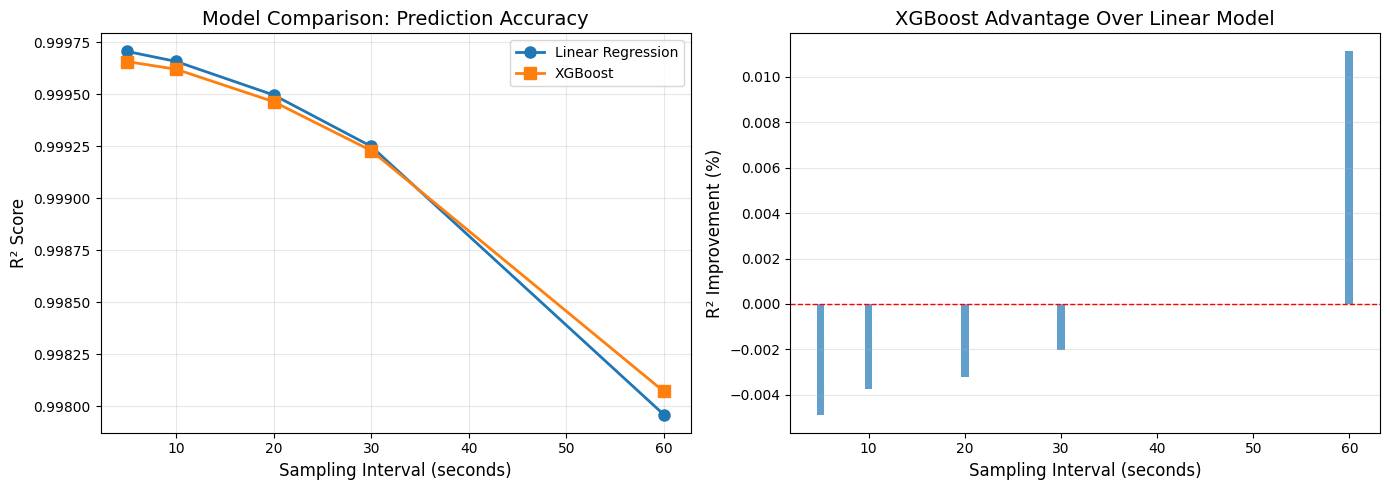

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

x = comparison_df['interval_seconds']
ax1.plot(x, comparison_df['r2_linear'], 'o-', label='Linear Regression', 
         linewidth=2, markersize=8)
ax1.plot(x, comparison_df['r2_xgboost'], 's-', label='XGBoost', 
         linewidth=2, markersize=8)
ax1.set_xlabel('Sampling Interval (seconds)', fontsize=12)
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_title('Model Comparison: Prediction Accuracy', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.bar(x, comparison_df['improvement_r2'] * 100, alpha=0.7)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax2.set_xlabel('Sampling Interval (seconds)', fontsize=12)
ax2.set_ylabel('R² Improvement (%)', fontsize=12)
ax2.set_title('XGBoost Advantage Over Linear Model', fontsize=14)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

**Conclusion**: XGBoost demonstrates performance nearly identical to linear regression, with differences effectively indistinguishable. This validates that PM temperature prediction is fundamentally linear when thermal history is available, and that additional model complexity provides no measurable benefit.

## 2.5 Multi-Output Neural Network

### 2.5.1 Motivation

So far, our models have achieved >99% accuracy predicting PM temperature using stator temperatures as input features. However, in cost-sensitive applications, even stator temperature sensors represent a significant expense and add system complexity through installation, calibration, and maintenance requirements. This motivates the investigation on whether ML-based prediction as a virtual sensor can substitute both rotor and stator sensors simultaneously.

Across multiple sampling intervals (0.5s, 5s, 10s, 30s, 60s), we investigate whether a multi-output neural network can accurately predict all motor temperatures (PM, stator winding, stator tooth, stator yoke) using only their previously predicted values (pm_lag1, stator_winding_lag1, stator_tooth_lag1, stator_yoke_lag1), operational parameters (current, voltage, speed, torque), and ambient temperature, eliminating the need for any internal temperature sensors.

The initialization strategy presented in Section 2.1.2 becomes more difficult to implement in this scenario: instead of assigning a value only to pm_lag1 with the help of measured stator temperatures, we must initialize all four lag features without any direct measurements. This would require more rigurous motor-specific thermal modelling to estimate initial temperatures from ambient conditions, idle duration, and the motor's thermal state before shutdown. While this adds complexity to system integration, it enables complete elimination of internal temperature sensing hardware.

**Research Question:** What accuracy can be achieved with a pure virtual sensor approach (no temperature sensors), and how does this compare to the hybrid approach (stator sensors available) at various sampling frequencies? 

### 2.5.2 Network Architecture

Neural network capacity must balance model expressiveness with overfitting risk and computational efficiency. Our baseline linear model achieves >99% accuracy, suggesting the problem is largely linear. However, without direct temperature sensors (pure virtual sensing), non-linear patterns may become more important. With no theoretical guidance for optimal architecture sizing, we empirically evaluate three configurations representing different capacity levels:

**Small [32, 16]:** 
- Parameters: ~864
- Hypothesis: Sufficient if problem is mostly linear (suggested by baseline)

**Medium [64, 32]:**
- Parameters: ~2,752  
- Hypothesis: Balanced capacity for moderate non-linearity

**Large [128, 64, 32]:**
- Parameters: ~11,424
- Hypothesis: Tests whether additional capacity helps at sparse sampling

All architectures use pyramidal structure (progressively smaller layers) and ReLU activation, following established practice for feedforward regression. The absence of output activation allows unrestricted continuous predictions for temperature values.

### 2.5.3 Hyperparameter Tuning

To identify optimal configurations for each sampling interval, we perform grid search over neural network architecture and L2 regularization strength. L2 regularization penalizes large network weights, controlling model complexity to prevent overfitting—a standard technique for neural network training.

**Search Space:**
- Intervals: [0.5, 5, 10, 30, 60] seconds
- Architectures: [32,16], [64,32], [128,64,32] (small, medium, large capacity)
- L2 regularization: λ ∈ {0, 0.0001, 0.001, 0.01, 0.1}
- Total combinations: 75 experiments (5 intervals × 3 architectures × 5 λ values)

**Methodology:**

For each sampling interval:

1. Create sparse dataset at target sampling rate
   
2. Split: 60% training, 20% validation, 20% test

3. For each architecture-λ combination:
<!--  -->
* Train model on training set (50 epochs, batch size 32)
* Evaluate performance on validation set
* Record validation MAE for all four temperatures
<!--  -->
4. Select configuration achieving lowest average validation MAE

5. This configuration is evaluated on test set (Section 2.5.5)

### 2.5.4 Multiple Model Training and Grid Search

In [24]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns

def build_model(architecture, lambda_reg):

    model = Sequential()
    model.add(Input(shape=(12,)))  # motor_speed, torque, i_d, i_q, u_d, u_q, coolant, ambient, stator_yoke_lag1, stator_tooth_lag1, stator_winding_lag1, pm_lag1
    
    for neurons in architecture:
        model.add(Dense(neurons, activation='relu', 
                       kernel_regularizer=l2(lambda_reg)))
    
    model.add(Dense(4))  # stator_yoke, stator_tooth, stator_winding, pm
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    return model

def create_sparse_dataset_and_lag_features(df, interval_seconds):

    samples_per_interval = int(interval_seconds * 2)  # 2Hz = 0.5s per sample
    df_sparse = df.iloc[::samples_per_interval].copy().reset_index(drop=True)
    
    df_sparse['pm_lag1'] = df_sparse.groupby('profile_id')['pm'].shift(1)
    df_sparse['stator_winding_lag1'] = df_sparse.groupby('profile_id')['stator_winding'].shift(1)
    df_sparse['stator_tooth_lag1'] = df_sparse.groupby('profile_id')['stator_tooth'].shift(1)
    df_sparse['stator_yoke_lag1'] = df_sparse.groupby('profile_id')['stator_yoke'].shift(1)

    df_sparse = df_sparse.dropna()
    
    return df_sparse

print("Helper functions loaded successfully.")

Helper functions loaded successfully.


**Computational Note:**

The following cell performs grid search over 75 configurations, which requires approximately 5-6 hours of training time. You have the following options for RUN_GRID_SEARCH:

1. RUN_GRID_SEARCH = True  : Execute full grid search
2. RUN_GRID_SEARCH = False : Load pre-computed results from CSV file (instant)

Pre-computed results are available in: 'nn_grid_search_results.csv'

**By default, RUN_GRID_SEARCH is set to False**

In [25]:
RUN_GRID_SEARCH = False  # Set to True to run full grid search

if not RUN_GRID_SEARCH:
    print("Loading pre-computed results from 'nn_grid_search_results.csv'...")
    try:
        results_df = pd.read_csv('nn_grid_search_results.csv')
        print(f"✓ Loaded {len(results_df)} experiment results")

    except FileNotFoundError:
        print("ERROR: 'nn_grid_search_results.csv' not found!")
        print("Please set RUN_GRID_SEARCH = True to generate results or download the file 'nn_grid_search_results.csv' from the project's repository")
        raise
else:
    print("Grid search will be executed. Estimated time: 2-3 hours")
    print("Results will be saved incrementally to 'nn_grid_search_results.csv'")

Loading pre-computed results from 'nn_grid_search_results.csv'...
✓ Loaded 75 experiment results


In [26]:
if RUN_GRID_SEARCH:
    
    sampling_intervals = [0.5, 5, 10, 30, 60]  # seconds
    
    architectures = {
        'Small [32, 16]': [32, 16],
        'Medium [64, 32]': [64, 32],
        'Large [128, 64, 32]': [128, 64, 32]
    }
    
    lambda_values = [0, 0.0001, 0.001, 0.01, 0.1]
    
    total_experiments = len(sampling_intervals) * len(architectures) * len(lambda_values)
    
    print(f"Starting grid search: {total_experiments} total experiments")
    print(f"{'='*80}\n")
    
    try:
        results_df = pd.read_csv('nn_grid_search_results.csv')
        print(f"Found existing results: {len(results_df)} experiments")
        completed = set(zip(
            results_df['interval'], 
            results_df['architecture'], 
            results_df['lambda']
        ))
        print(f"Resuming from checkpoint...\n")
    except FileNotFoundError:
        results_df = pd.DataFrame()
        completed = set()
        print("Starting fresh (no previous results found)\n")
    
    
    experiment_count = len(completed)
    overall_start = time.time()
    
    for interval_idx, interval in enumerate(sampling_intervals):
        
        print(f"\n{'='*80}")
        print(f"INTERVAL {interval_idx+1}/{len(sampling_intervals)}: {interval}s")
        print(f"{'='*80}\n")
        
        print(f"Creating sparse dataset ({interval}s intervals)...", end=' ')
        df_sparse = create_sparse_dataset_and_lag_features(df, interval)
        print(f"✓ {len(df_sparse)} samples")
        
        X_sparse = df_sparse[[
            'motor_speed', 'torque', 'i_d', 'i_q', 'u_d', 'u_q',
            'coolant', 'ambient',
            'pm_lag1', 'stator_winding_lag1', 
            'stator_tooth_lag1', 'stator_yoke_lag1'
        ]]
        
        y_sparse = df_sparse[['pm', 'stator_winding', 'stator_tooth', 'stator_yoke']]
        
        n = len(X_sparse)
        train_end = int(0.6 * n)
        val_end = int(0.8 * n)
        
        X_train = X_sparse.iloc[:train_end]
        y_train = y_sparse.iloc[:train_end]
        X_val = X_sparse.iloc[train_end:val_end]
        y_val = y_sparse.iloc[train_end:val_end]
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        print(f"Split: Train={len(X_train)}, Val={len(X_val)}\n")
        
        for arch_name, arch in architectures.items():
            
            print(f"{arch_name}")
            print(f"{'-'*80}")
            
            for lam in lambda_values:
                
                if (interval, arch_name, lam) in completed:
                    print(f"  λ={lam:7.4f} ... SKIPPED (already done)")
                    continue
                
                experiment_count += 1
                
                elapsed = time.time() - overall_start
                if experiment_count > len(completed):
                    avg_time = elapsed / (experiment_count - len(completed))
                    remaining = (total_experiments - experiment_count) * avg_time
                    eta_str = f"ETA: {remaining/3600:.1f}h"
                else:
                    eta_str = "calculating..."
                
                print(f"  λ={lam:7.4f} ... [{experiment_count}/{total_experiments}] {eta_str}", 
                      end=' ', flush=True)
                
                exp_start = time.time()
                
                try:
                    
                    model = build_model(arch, lam)
                    
                    model.fit(
                        X_train_scaled, y_train,
                        epochs=50,
                        batch_size=32,
                        verbose=1,
                        validation_data=(X_val_scaled, y_val)
                    )
                    
                    y_train_pred = model.predict(X_train_scaled, verbose=0)
                    train_mae_pm = mean_absolute_error(y_train['pm'], y_train_pred[:, 0])
                    train_r2_pm = r2_score(y_train['pm'], y_train_pred[:, 0])
                    
                    y_val_pred = model.predict(X_val_scaled, verbose=0)
                    val_mae_pm = mean_absolute_error(y_val['pm'], y_val_pred[:, 0])
                    val_r2_pm = r2_score(y_val['pm'], y_val_pred[:, 0])
                    
                    val_mae_winding = mean_absolute_error(y_val['stator_winding'], y_val_pred[:, 1])
                    val_mae_tooth = mean_absolute_error(y_val['stator_tooth'], y_val_pred[:, 2])
                    val_mae_yoke = mean_absolute_error(y_val['stator_yoke'], y_val_pred[:, 3])
                    
                    exp_time = time.time() - exp_start
                    
                    new_result = pd.DataFrame([{
                        'interval': interval,
                        'architecture': arch_name,
                        'arch_list': str(arch),
                        'lambda': lam,
                        'train_mae_pm': train_mae_pm,
                        'train_r2_pm': train_r2_pm,
                        'val_mae_pm': val_mae_pm,
                        'val_r2_pm': val_r2_pm,
                        'val_mae_winding': val_mae_winding,
                        'val_mae_tooth': val_mae_tooth,
                        'val_mae_yoke': val_mae_yoke,
                        'training_time_sec': exp_time,
                        'timestamp': datetime.now().isoformat()
                    }])
                    
                    results_df = pd.concat([results_df, new_result], ignore_index=True)
                    
                    results_df.to_csv('nn_grid_search_results.csv', index=False)
                    
                    print(f"Val R²={val_r2_pm:.4f}, MAE={val_mae_pm:.2f}°C ({exp_time:.0f}s)")
                    
                except Exception as e:
                    print(f"ERROR: {str(e)}")
                    continue
            
            print()

    total_time = time.time() - overall_start
    
    print(f"\n{'='*80}")
    print(f"GRID SEARCH COMPLETE!")
    print(f"{'='*80}")
    print(f"Total experiments: {len(results_df)}")
    print(f"Total time: {total_time/3600:.2f} hours")
    print(f"Average time per experiment: {total_time/len(results_df):.1f} seconds")
    print(f"Results saved to: 'nn_grid_search_results.csv'")
    print(f"{'='*80}\n")

else:
    print("Skipping grid search (using pre-computed results)")

Skipping grid search (using pre-computed results)


In [27]:
import pandas as pd
import numpy as np

df_nn = pd.read_csv('nn_grid_search_results.csv')

print("\nAverage MAE per interval:")
avg_per_interval = df_nn.groupby('interval')[['val_mae_pm', 'val_mae_winding', 'val_mae_tooth', 'val_mae_yoke']].mean()
print(avg_per_interval.round(4))


Average MAE per interval:
          val_mae_pm  val_mae_winding  val_mae_tooth  val_mae_yoke
interval                                                          
0.5           0.0874           0.0906         0.1210        0.0830
5.0           0.2228           0.3787         0.3116        0.2180
10.0          0.2732           0.6620         0.4328        0.2907
30.0          0.5148           1.6607         0.8558        0.5753
60.0          0.9215           3.1515         1.7236        1.0187


<div style="text-align: center; margin-bottom: 10px; margin-top:20px">
    <strong style="font-size: 14px;">Figure 6: Performance Degradation vs. Sampling Frequency</strong>
</div>

<div style="text-align: center; font-style: italic;">
    Average Across All Configurations
</div>

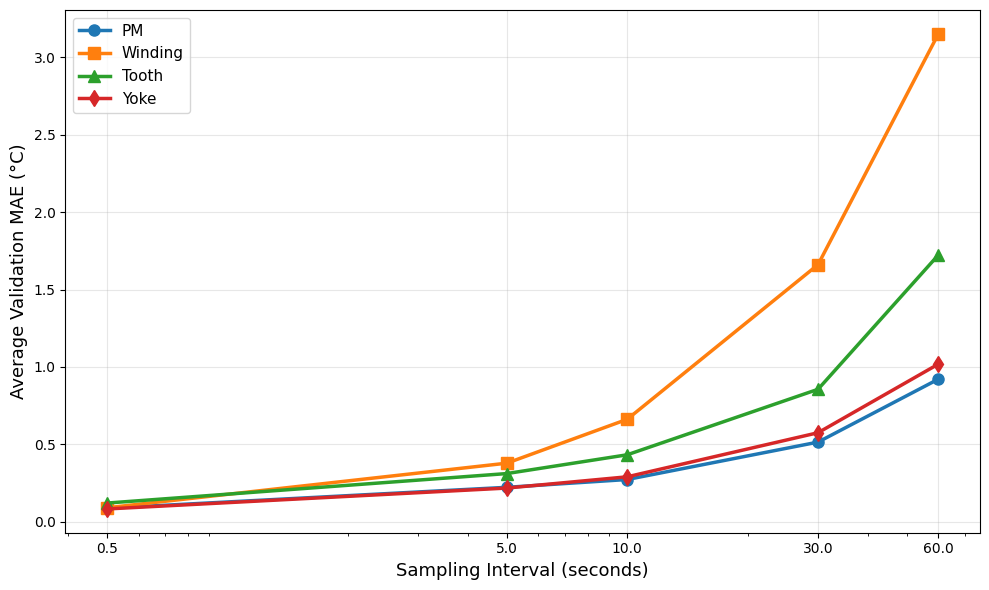

In [28]:
import matplotlib.pyplot as plt
import numpy as np

intervals = avg_per_interval.index.values.tolist()
pm_avg = avg_per_interval['val_mae_pm']
winding_avg = avg_per_interval['val_mae_winding']
tooth_avg = avg_per_interval['val_mae_tooth']
yoke_avg = avg_per_interval['val_mae_yoke']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(intervals, pm_avg, 'o-', label='PM', linewidth=2.5, markersize=8)
ax.plot(intervals, winding_avg, 's-', label='Winding', linewidth=2.5, markersize=8)
ax.plot(intervals, tooth_avg, '^-', label='Tooth', linewidth=2.5, markersize=8)
ax.plot(intervals, yoke_avg, 'd-', label='Yoke', linewidth=2.5, markersize=8)

ax.set_xlabel('Sampling Interval (seconds)', fontsize=13)
ax.set_ylabel('Average Validation MAE (°C)', fontsize=13)

ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xscale('log')
ax.set_xticks(intervals)
ax.set_xticklabels(intervals)

plt.tight_layout()
plt.show()

As expected, performance degrades monotonically with progressively sparser sampling, which validates the grid search methodology.

In [29]:
print("\nBest configuration per interval (minimum average MAE):")

best_configs = []

for interval in sorted(df_nn['interval'].unique()):
    df_int = df_nn[df_nn['interval'] == interval].copy()
    df_int['avg_mae'] = (df_int['val_mae_pm'] + df_int['val_mae_winding'] + 
                         df_int['val_mae_tooth'] + df_int['val_mae_yoke']) / 4
    
    best_row = df_int.loc[df_int['avg_mae'].idxmin()]
    best_configs.append(best_row)
    
    print(f"\n   {interval}s: Arch={best_row['architecture']}, λ={best_row['lambda']}")
    print(f"   MAEs - PM:{best_row['val_mae_pm']:.3f} Winding:{best_row['val_mae_winding']:.3f} "
          f"Tooth:{best_row['val_mae_tooth']:.3f} Yoke:{best_row['val_mae_yoke']:.3f}")

best = pd.DataFrame(best_configs)
best = best.reset_index(drop=True)


Best configuration per interval (minimum average MAE):

   0.5s: Arch=Large [128, 64, 32], λ=0.0
   MAEs - PM:0.056 Winding:0.058 Tooth:0.056 Yoke:0.026

   5.0s: Arch=Small [32, 16], λ=0.0001
   MAEs - PM:0.157 Winding:0.299 Tooth:0.184 Yoke:0.127

   10.0s: Arch=Small [32, 16], λ=0.0001
   MAEs - PM:0.191 Winding:0.537 Tooth:0.372 Yoke:0.204

   30.0s: Arch=Medium [64, 32], λ=0.01
   MAEs - PM:0.384 Winding:1.614 Tooth:0.795 Yoke:0.444

   60.0s: Arch=Small [32, 16], λ=0.1
   MAEs - PM:0.622 Winding:3.031 Tooth:1.602 Yoke:1.005


For each sampling interval, the configuration achieving lowest average validation MAE was selected for final evaluation. Optimal configurations vary by interval: dense sampling (0.5s) favors larger architectures with minimal regularization, while sparse sampling (60s) requires stronger regularization to prevent overfitting. 

This is different from our initial hypotheses, which predicted large networks would help at sparse sampling by capturing complex slow dynamics. Validation results revealed the opposite: optimal architecture depends on data availability. Dense sampling (0.5s intervals, >1.3M samples) supports large architectures without overfitting risk, while sparse sampling (60s intervals, >10.000 samples) requires smaller networks with stronger regularization to prevent overfitting to limited data. The problem remains fundamentally linear at all sampling rates, what changes is the data abundance that determines safe network capacity.

These five configurations are evaluated on the test set to assess generalization performance:

### 2.5.5 Testing Optimal Configurations

**Computational Note:**

For each sampling interval, the optimal configuration is retrained on the combined training and validation sets (80% of data), then evaluated on the test set (20%). This retraining is standard practice and maximizes available data for the final model while maintaining unbiased test evaluation.

Training all five configurations requires approximately 30-60 minutes. You have the following options for RUN_TEST:

1. RUN_TEST = True: Execute full test evaluation
2. RUN_TEST = False: Load pre-computed results from CSV file (instant)

Pre-computed results are available in: nn_test_results.csv

**By default, RUN_TEST is set to False**

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

RUN_TEST = False  # Set to True to run test

if RUN_TEST:

    results_df = pd.DataFrame()
    os.makedirs('models', exist_ok=True)
    
    print("Testing best configurations on test set:")
    print("="*80)
    
    for interval in sorted(best['interval'].unique()):
        
        print(f"\nInterval: {interval}s")
        
        best_config = best[best['interval'] == interval].iloc[0]
        
        df_sparse = create_sparse_dataset_and_lag_features(df, interval)
        
        X_sparse = df_sparse[[
            'motor_speed', 'torque', 'i_d', 'i_q', 'u_d', 'u_q',
            'coolant', 'ambient',
            'pm_lag1', 'stator_winding_lag1', 
            'stator_tooth_lag1', 'stator_yoke_lag1'
        ]]
        
        y_sparse = df_sparse[['pm', 'stator_winding', 'stator_tooth', 'stator_yoke']]
        
        n = len(X_sparse)
        train_end = int(0.8 * n)
        
        X_train = X_sparse.iloc[:train_end]
        y_train = y_sparse.iloc[:train_end]
        X_test = X_sparse.iloc[train_end:]
        y_test = y_sparse.iloc[train_end:]
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        arch_str = best_config['arch_list']
        if arch_str == '[128, 64, 32]':
            arch = [128, 64, 32]
        elif arch_str == '[64, 32]':
            arch = [64, 32]
        elif arch_str == '[32, 16]':
            arch = [32, 16]
        else:
            raise ValueError(f"Unknown architecture: {arch_str}")
        
        print(f"  Architecture: {arch}, Lambda: {best_config['lambda']}")
        
        model = build_model(arch, best_config['lambda'])
        
        print("  Training...", end=' ', flush=True)
        model.fit(
            X_train_scaled, y_train,
            epochs=50,
            batch_size=32,
            verbose=1,
            validation_data=(X_test_scaled, y_test)
        )
        print("✓")
        
        model.save(f'models/model_{interval}s_optimal.keras')
            
        y_train_pred = model.predict(X_train_scaled, verbose=0)
        train_mae_pm = mean_absolute_error(y_train['pm'], y_train_pred[:, 0])
        train_r2_pm = r2_score(y_train['pm'], y_train_pred[:, 0])
        
        y_test_pred = model.predict(X_test_scaled, verbose=0)
        test_mae_pm = mean_absolute_error(y_test['pm'], y_test_pred[:, 0])
        test_r2_pm = r2_score(y_test['pm'], y_test_pred[:, 0])
        
        test_mae_winding = mean_absolute_error(y_test['stator_winding'], y_test_pred[:, 1])
        test_mae_tooth = mean_absolute_error(y_test['stator_tooth'], y_test_pred[:, 2])
        test_mae_yoke = mean_absolute_error(y_test['stator_yoke'], y_test_pred[:, 3])
        
        test_r2_winding = r2_score(y_test['stator_winding'], y_test_pred[:, 1])
        test_r2_tooth = r2_score(y_test['stator_tooth'], y_test_pred[:, 2])
        test_r2_yoke = r2_score(y_test['stator_yoke'], y_test_pred[:, 3])
        
        print(f"  Test Results:")
        print(f"    PM:      MAE={test_mae_pm:.3f}°C, R²={test_r2_pm:.4f}")
        print(f"    Winding: MAE={test_mae_winding:.3f}°C, R²={test_r2_winding:.4f}")
        print(f"    Tooth:   MAE={test_mae_tooth:.3f}°C, R²={test_r2_tooth:.4f}")
        print(f"    Yoke:    MAE={test_mae_yoke:.3f}°C, R²={test_r2_yoke:.4f}")
        
        new_result = pd.DataFrame([{
            'interval': interval,
            'architecture': arch_str,
            'lambda': best_config['lambda'],
            'train_mae_pm': train_mae_pm,
            'train_r2_pm': train_r2_pm,
            'test_mae_pm': test_mae_pm,
            'test_r2_pm': test_r2_pm,
            'test_mae_winding': test_mae_winding,
            'test_r2_winding': test_r2_winding,
            'test_mae_tooth': test_mae_tooth,
            'test_r2_tooth': test_r2_tooth,
            'test_mae_yoke': test_mae_yoke,
            'test_r2_yoke': test_r2_yoke
        }])

        X_sample = X_test_scaled[0:1]
        add_computational_cost(
            model=model,
            X_sample=X_sample,
            model_type="Neural Network",
            interval=f"{interval}s",
            architecture=arch_str
        )
        
        results_df = pd.concat([results_df, new_result], ignore_index=True)
        results_df.to_csv('nn_test_results.csv', index=False)
    
    print("\n" + "="*80)
    print("Test evaluation complete!")
    print(f"Results saved to: nn_test_results.csv")
    print("\nSummary:")
    print(results_df[['interval', 'architecture', 'test_mae_pm', 'test_mae_winding', 
                      'test_mae_tooth', 'test_mae_yoke']].to_string(index=False))

else:
    print("Skipping test (using pre-computed results)")

Skipping test (using pre-computed results)


In [31]:
print("\nTest Set Performance Summary:")
print(f"{'Interval':>10s} {'PM MAE':>10s} {'Winding MAE':>12s} {'Tooth MAE':>11s} {'Yoke MAE':>10s}")

try:
    test_results = pd.read_csv('nn_test_results.csv')
    print(f"✓ Loaded {len(test_results)} test results")
    for _, row in test_results.iterrows():
        print(f"{row['interval']:>10.1f} {row['test_mae_pm']:>10.3f} "
              f"{row['test_mae_winding']:>12.3f} {row['test_mae_tooth']:>11.3f} "
              f"{row['test_mae_yoke']:>10.3f}")
except FileNotFoundError:
    print("ERROR: 'nn_test_results.csv' not found!")
    print("Please set RUN_TEST = True to generate results or download the file 'nn_test_results.csv' from the project's repository")
    raise


Test Set Performance Summary:
  Interval     PM MAE  Winding MAE   Tooth MAE   Yoke MAE
✓ Loaded 5 test results
       0.5      0.059        0.050       0.050      0.062
       5.0      0.147        0.292       0.182      0.113
      10.0      0.171        0.581       0.291      0.223
      30.0      0.385        1.394       0.710      0.499
      60.0      0.661        2.584       1.425      0.842


<div style="text-align: center; margin-bottom: 10px; margin-top:20px">
    <strong style="font-size: 14px;">Figure 7: Prediction Accuracy vs Sampling Frequency</strong>
</div>

<div style="text-align: center; font-style: italic;">
    Best Configuration per Interval
</div>

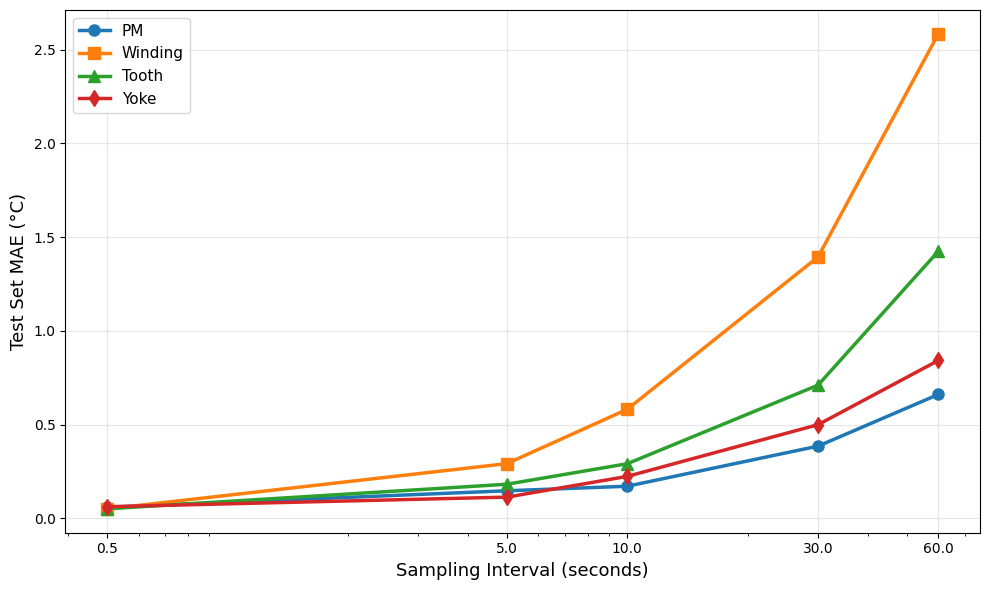

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(test_results['interval'], test_results['test_mae_pm'], 
        'o-', label='PM', linewidth=2.5, markersize=8)
ax.plot(test_results['interval'], test_results['test_mae_winding'], 
        's-', label='Winding', linewidth=2.5, markersize=8)
ax.plot(test_results['interval'], test_results['test_mae_tooth'], 
        '^-', label='Tooth', linewidth=2.5, markersize=8)
ax.plot(test_results['interval'], test_results['test_mae_yoke'], 
        'd-', label='Yoke', linewidth=2.5, markersize=8)

ax.set_xlabel('Sampling Interval (seconds)', fontsize=13)
ax.set_ylabel('Test Set MAE (°C)', fontsize=13)

ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xscale('log')
ax.set_xticks(test_results['interval'])
ax.set_xticklabels(test_results['interval'])

plt.tight_layout()
plt.show()

**Dense sampling (0.5-10s) - Excellent performance**

PM, tooth, and yoke maintain very low MAE across all intervals in this range, enabling precise thermal monitoring suitable for real-time protection systems. Winding temperature shows systematically higher errors compared to other motor components, which reflects its rapid thermal response to electrical heating (I²R losses): **the winding thermal time constant is significantly shorter than PM, tooth, or yoke**. At sparse sampling, fast transients between measurements are poorly captured, leading to larger interpolation errors. Despite this, winding prediction at 10s intervals provides acceptable accuracy for many monitoring scenarios, though real-time protection applications with tight thermal margins would benefit from higher sampling rates.

**Moderate sampling (30s) - Good performance**

At 30s intervals, PM and yoke temperature predictions maintain high accuracy, while winding shows moderate degradation. This performance level suits condition monitoring applications where gradual thermal change detection (timescale: minutes to hours) is the objective rather than instantaneous tracking. Tooth temperature predictions show intermediate behavior, reflecting its medium thermal time constant.

**Sparse sampling (60s) - Acceptable with limitations**

At 60s intervals, PM, yoke and tooth predictions remain viable, but winding shows elevated errors. While acceptable for long-term health monitoring, this error magnitude approaches levels that could cause false alarms in protection systems with tight thermal thresholds. To understand whether these errors reflect fundamental sampling limitations or systematic modeling deficiencies, we perform an error analysis for the 60s configuration in section 2.6.

## 2.6 Error Analysis

Error analysis examines prediction errors beyond aggregate metrics (MAE, R²) to identify systematic patterns or biases. Rather than simply reporting overall accuracy, we investigate:

1. Temporal patterns: Do errors show systematic trends (drift, cycles) or remain randomly distributed?
2. Operating condition dependencies: Do errors correlate with motor speed, torque, current, or other operational parameters?
3. Statistical distribution: Are errors normally distributed (indicating random residuals) or systematically biased?

This analysis validates whether the model has learned underlying thermal dynamics correctly or exhibits systematic deficiencies that aggregate metrics might obscure. We focus on the neural network with optimal hyperparameters ([32,16] architecture, λ=0.1) at 60s interval, where winding temperature shows the highest error.

In [33]:
import os
from tensorflow import keras

df_sparse_60s = create_sparse_dataset_and_lag_features(df, 60)

X_60s = df_sparse_60s[[
    'motor_speed', 'torque', 'i_d', 'i_q', 'u_d', 'u_q',
    'coolant', 'ambient',
    'pm_lag1', 'stator_winding_lag1', 
    'stator_tooth_lag1', 'stator_yoke_lag1'
]]

y_60s = df_sparse_60s[['pm', 'stator_winding', 'stator_tooth', 'stator_yoke']]

n = len(X_60s)
train_end = int(0.8 * n)

X_train_60s = X_60s.iloc[:train_end]
y_train_60s = y_60s.iloc[:train_end]
X_test_60s = X_60s.iloc[train_end:]
y_test_60s = y_60s.iloc[train_end:]

scaler_60s = StandardScaler()
X_train_60s_scaled = scaler_60s.fit_transform(X_train_60s)
X_test_60s_scaled = scaler_60s.transform(X_test_60s)

model_path = 'models/model_60.0s_optimal.keras'

if os.path.exists(model_path):
    print(f"Loading optimal 60s model from test evaluation...")
    model_60s = keras.models.load_model(model_path)
    print("✓ Model loaded successfully")
    print("  (Using exact model from Section 2.5.5 for consistent results)")
else:
    print("⚠ Model file not found - training new model...")
    print("  (Run RUN_TEST = True in Section 2.5.5 to generate saved model)")

    best_60s = test_results[test_results['interval'] == 60].iloc[0]
    arch_str = best_60s['architecture']
    lambda_val = best_60s['lambda']

    if arch_str == '[128, 64, 32]':
        arch = [128, 64, 32]
    elif arch_str == '[64, 32]':
        arch = [64, 32]
    elif arch_str == '[32, 16]':
        arch = [32, 16]
    else:
        raise ValueError(f"Unknown architecture: {arch_str}")

    model_60s = build_model(arch, lambda_val)

    print("Training 60s model (this will take about 30 seconds)...")
    model_60s.fit(
        X_train_60s_scaled, y_train_60s,
        epochs=50,
        batch_size=32,
        verbose=0,
        validation_data=(X_test_60s_scaled, y_test_60s)
    )
    print("  ✓ Training complete")

y_pred_60s = model_60s.predict(X_test_60s_scaled, verbose=0)
print(f"✓ Predictions generated: {len(y_test_60s)} samples")

Loading optimal 60s model from test evaluation...
✓ Model loaded successfully
  (Using exact model from Section 2.5.5 for consistent results)
✓ Predictions generated: 2205 samples


<div style="text-align: center; margin-bottom: 10px; margin-top:20px">
    <strong style="font-size: 14px;">Figure 8: Error Analysis - Winding Temperature at 60s Sampling Interval</strong>
</div>

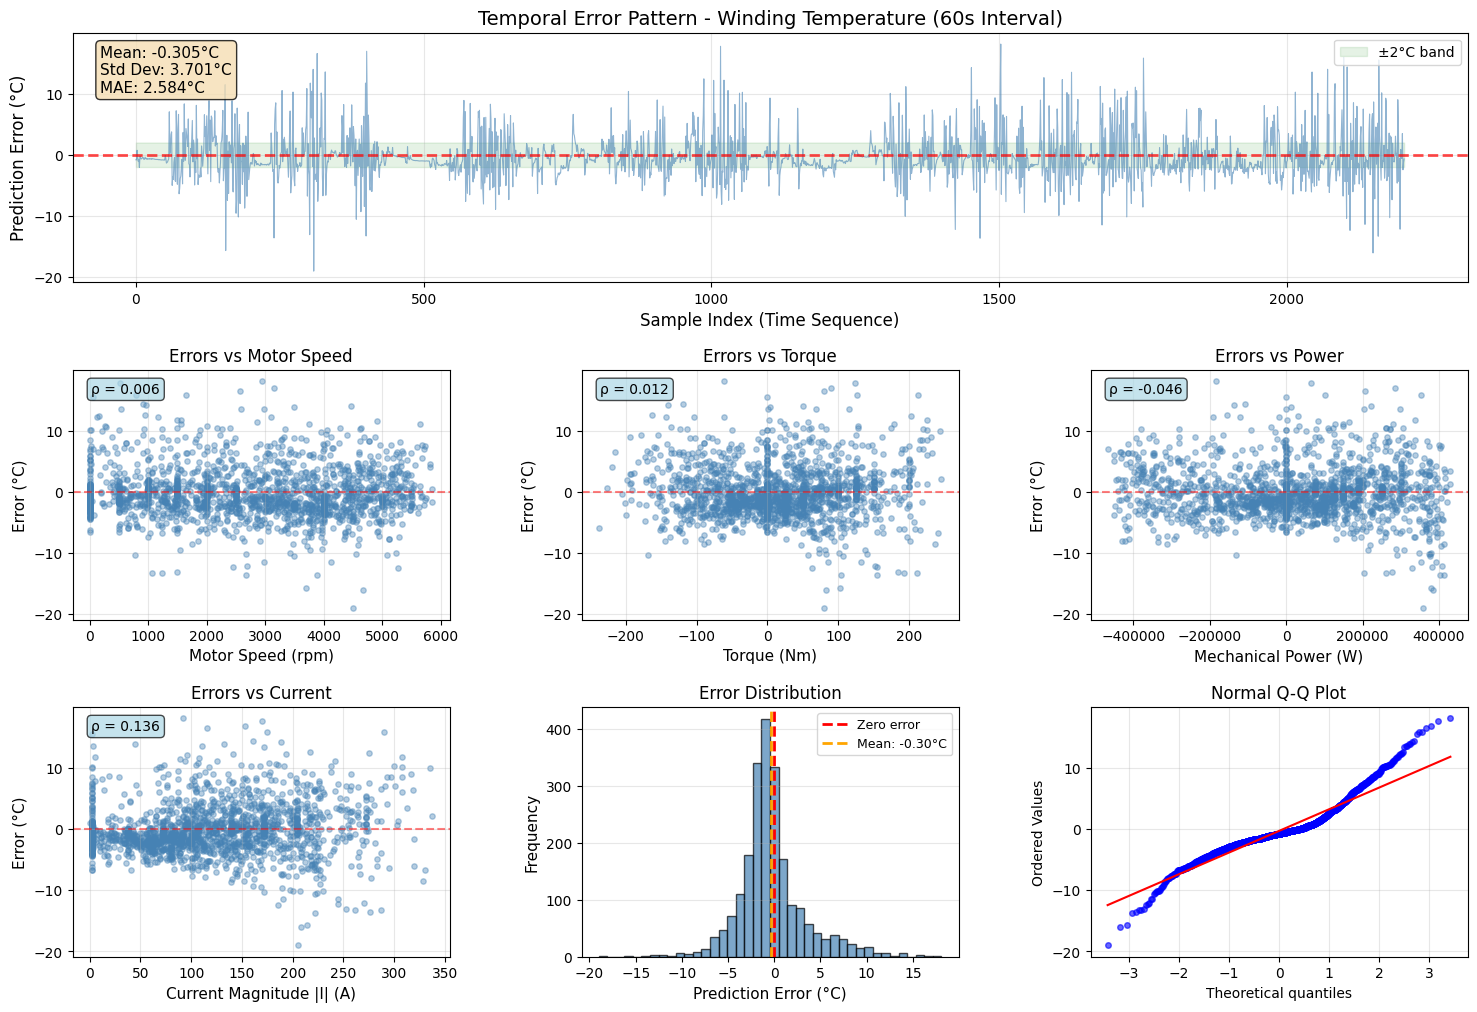

In [34]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

errors = y_test_60s['stator_winding'] - y_pred_60s[:, 1]
current_mag = np.sqrt(X_test_60s['i_d']**2 + X_test_60s['i_q']**2)
power = X_test_60s['motor_speed'] * X_test_60s['torque']

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.35)


ax1 = fig.add_subplot(gs[0, :])
ax1.plot(errors.values, alpha=0.6, linewidth=0.8, color='steelblue')
ax1.axhline(0, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax1.fill_between(range(len(errors)), -2, 2, alpha=0.1, color='green', label='±2°C band')
ax1.set_xlabel('Sample Index (Time Sequence)', fontsize=12)
ax1.set_ylabel('Prediction Error (°C)', fontsize=12)
ax1.set_title('Temporal Error Pattern - Winding Temperature (60s Interval)', 
              fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')

stats_text = f'Mean: {errors.mean():.3f}°C\nStd Dev: {errors.std():.3f}°C\nMAE: {np.abs(errors).mean():.3f}°C'
ax1.text(0.02, 0.95, stats_text, transform=ax1.transAxes, fontsize=11, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))


ax2 = fig.add_subplot(gs[1, 0])
ax2.scatter(X_test_60s['motor_speed'], errors, alpha=0.4, s=15, color='steelblue')
ax2.axhline(0, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax2.set_xlabel('Motor Speed (rpm)', fontsize=11)
ax2.set_ylabel('Error (°C)', fontsize=11)
ax2.set_title('Errors vs Motor Speed', fontsize=12)
ax2.grid(True, alpha=0.3)

corr_speed = np.corrcoef(X_test_60s['motor_speed'], errors)[0,1]
ax2.text(0.05, 0.95, f'ρ = {corr_speed:.3f}', transform=ax2.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))


ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(X_test_60s['torque'], errors, alpha=0.4, s=15, color='steelblue')
ax3.axhline(0, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax3.set_xlabel('Torque (Nm)', fontsize=11)
ax3.set_ylabel('Error (°C)', fontsize=11)
ax3.set_title('Errors vs Torque', fontsize=12)
ax3.grid(True, alpha=0.3)

corr_torque = np.corrcoef(X_test_60s['torque'], errors)[0,1]
ax3.text(0.05, 0.95, f'ρ = {corr_torque:.3f}', transform=ax3.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))


ax4 = fig.add_subplot(gs[1, 2])
ax4.scatter(power, errors, alpha=0.4, s=15, color='steelblue')
ax4.axhline(0, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax4.set_xlabel('Mechanical Power (W)', fontsize=11)
ax4.set_ylabel('Error (°C)', fontsize=11)
ax4.set_title('Errors vs Power', fontsize=12)
ax4.grid(True, alpha=0.3)

corr_power = np.corrcoef(power, errors)[0,1]
ax4.text(0.05, 0.95, f'ρ = {corr_power:.3f}', transform=ax4.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))


ax5 = fig.add_subplot(gs[2, 0])
ax5.scatter(current_mag, errors, alpha=0.4, s=15, color='steelblue')
ax5.axhline(0, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax5.set_xlabel('Current Magnitude |I| (A)', fontsize=11)
ax5.set_ylabel('Error (°C)', fontsize=11)
ax5.set_title('Errors vs Current', fontsize=12)
ax5.grid(True, alpha=0.3)

corr_current = np.corrcoef(current_mag, errors)[0,1]
ax5.text(0.05, 0.95, f'ρ = {corr_current:.3f}', transform=ax5.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))


ax6 = fig.add_subplot(gs[2, 1])
n, bins, patches = ax6.hist(errors, bins=40, edgecolor='black', alpha=0.7, color='steelblue')
ax6.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero error')
ax6.axvline(errors.mean(), color='orange', linestyle='--', linewidth=2, 
            label=f'Mean: {errors.mean():.2f}°C')
ax6.set_xlabel('Prediction Error (°C)', fontsize=11)
ax6.set_ylabel('Frequency', fontsize=11)
ax6.set_title('Error Distribution', fontsize=12)
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3, axis='y')


ax7 = fig.add_subplot(gs[2, 2])
stats.probplot(errors, dist="norm", plot=ax7)
ax7.get_lines()[0].set_marker('o')
ax7.get_lines()[0].set_markersize(4)
ax7.get_lines()[0].set_alpha(0.6)
ax7.set_title('Normal Q-Q Plot', fontsize=12)
ax7.grid(True, alpha=0.3)

plt.show()

**Temporal Analysis:**
Prediction errors scatter randomly around zero throughout the test sequence with no systematic drift or periodic patterns. The mean error indicates negligible bias (<30% of MAE), confirming negligible systematic bias. This random temporal distribution validates that the model captures thermal dynamics without accumulated error over time.

**Operating Condition Dependencies:**
Error magnitude shows no meaningful correlation with motor speed, torque, mechanical power, or current magnitude due to the low values of Pearson's correlation coefficient. This indicates a uniform prediction accuracy across the operational envelope, confirming that the model generalizes well without regime-dependent performance degradation.

**Statistical Distribution:**
Error distribution shows approximately symmetric, single-peaked shape with a slight negative offset. The singular peak highlights consistent error characteristics across all operating conditions, with no evidence of regime-dependent modeling failures. The offset, in turn,  indicates that the model tends to slightly underpredict winding temperature on average, though this bias is small relative to typical error magnitude. The Q-Q plot confirms the findings with a reasonably linear distribution through most of the range, showing deviations only at the extremes.

**Conclusion:**
Error analysis validates that elevated winding prediction errors at 60s sampling reflect information loss from sparse sampling rather than systematic modeling deficiencies. Errors remain random, unbiased, and uniformly distributed across operating conditions. The model has learned underlying thermal dynamics correctly and degradation stems from fundamental sampling limitations where the winding thermal time constant (~5-10s) is significantly lower than the sampling interval, causing rapid thermal transients to be poorly captured between measurements.

## 2.7 Deployment Feasibility Assessment

Having established model accuracy across sampling intervals (Sections 2.2-2.5) and characterized error behavior (Section 2.6), we now assess deployment feasibility for embedded systems. Throughout Sections 2.2-2.5, we have recorded the inference time and memory requirements for three model types (linear regression, XGBoost, neural networks) and multiple sampling intervals (0.5-60 seconds). Inference time was measured for each model by executing predictions on a single test sample 1,000 times and averaging the elapsed time, while memory requirements were assessed by measuring saved model file sizes.

We assess deployment feasibility against two constraints derived from automotive ECU specifications:

**Temporal constraint:** Inference time must remain substantially below the sampling interval to accommodate operating system overhead, sensor I/O, and concurrent control tasks. We adopt a conservative criterion requiring inference time to consume less than 10% of the sampling interval (x10 safety margin).

**Memory constraint:** Modern automotive microcontrollers for powertrain control typically provide 512 KB to 2 MB of RAM (e.g., Infineon AURIX TC3xx, NXP S32K series). Thermal monitoring models must coexist with other control algorithms and operating system overhead so we adopt 512 KB as a conservative constraint for model storage allocation.


**This section evaluates whether measured computational requirements satisfy these criteria across all tested configurations:**

In [35]:
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
import numpy as np

costs_df = pd.read_csv('computational_cost_analysis.csv')

xgb_file = 'models/xgb_60s.pkl'
if os.path.exists(xgb_file):
    xgb_size_kb = os.path.getsize(xgb_file) / 1024
    
    mask = costs_df['model_type'] == 'XGBoost'
    costs_df.loc[mask, 'model_size_kb'] = xgb_size_kb
    
else:
    print(f"  ⚠ XGBoost model file not found: {xgb_file}")

nn_files = {
    ('Neural Network', '0.5s', '[128, 64, 32]'): 'models/model_0.5s_optimal.keras',
    ('Neural Network', '5.0s', '[32, 16]'): 'models/model_5.0s_optimal.keras',
    ('Neural Network', '10.0s', '[32, 16]'): 'models/model_10.0s_optimal.keras',
    ('Neural Network', '30.0s', '[64, 32]'): 'models/model_30.0s_optimal.keras',
    ('Neural Network', '60.0s', '[32, 16]'): 'models/model_60.0s_optimal.keras',
}

for (model_type, interval, arch), filepath in nn_files.items():
    if os.path.exists(filepath):
        size_kb = os.path.getsize(filepath) / 1024
        
        mask = (
            (costs_df['model_type'] == model_type) & 
            (costs_df['interval'] == interval) &
            (costs_df['architecture'] == arch)
        )
        
        if mask.any():
            costs_df.loc[mask, 'model_size_kb'] = size_kb
    else:
        print(f"  ⚠ File not found: {filepath}")

lr_params = 12
lr_size_kb = (lr_params * 8 + 64) / 1024

mask = costs_df['model_type'].str.contains('Linear Regression')
costs_df.loc[mask, 'model_size_kb'] = lr_size_kb

costs_df.to_csv('computational_cost_analysis.csv', index=False)

print("\nComplete Results:")
print(costs_df.to_string(index=False))


Complete Results:
                model_type interval  architecture  inference_time_us  throughput_per_sec  model_size_kb
         Linear Regression     0.5s             -            50.9598        19623.310923       0.156250
Linear Regression (Sparse)     1.0s             -            49.9613        20015.491990       0.156250
Linear Regression (Sparse)     2.0s             -            51.0791        19577.478851       0.156250
Linear Regression (Sparse)     5.0s             -            49.1124        20361.456577       0.156250
Linear Regression (Sparse)    10.0s             -            51.4114        19450.938897       0.156250
Linear Regression (Sparse)    20.0s             -            51.8652        19280.750869       0.156250
Linear Regression (Sparse)    30.0s             -            51.3176        19486.491964       0.156250
Linear Regression (Sparse)    60.0s             -            51.5097        19413.819145       0.156250
                   XGBoost     5.0s          

<div style="text-align: center; margin-bottom: 10px; margin-top:20px">
    <strong style="font-size: 14px;">Figure 9: Deployment Feasibility Analysis Across All Models</strong>
</div>

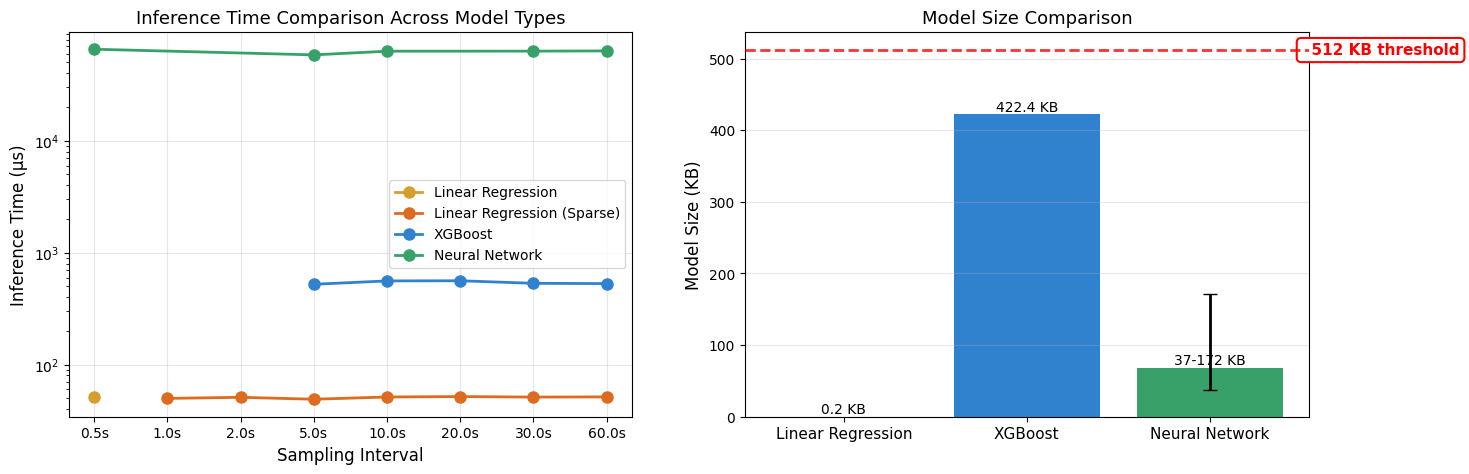

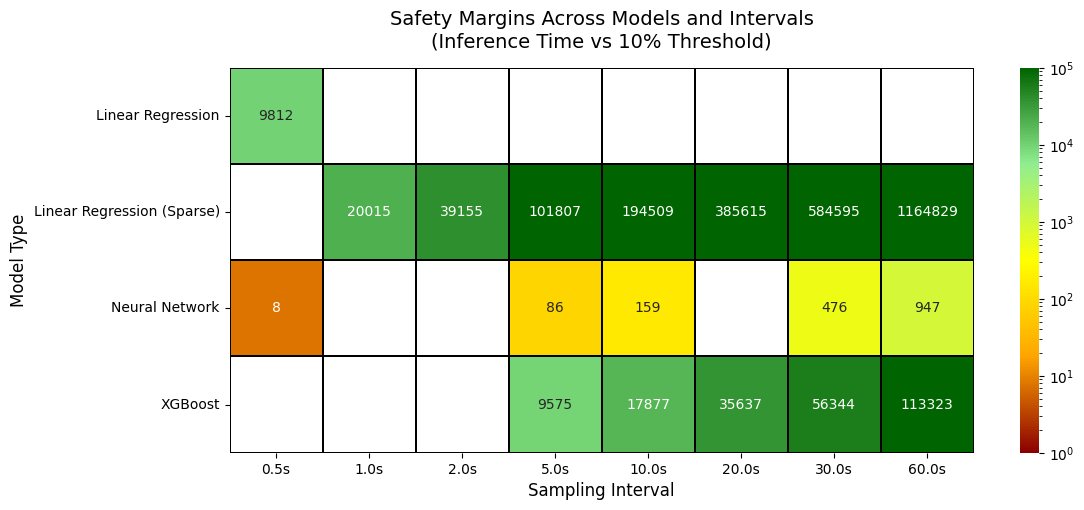

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#d69e2e', '#dd6b20', '#3182ce', '#38a169']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

for i, model_type in enumerate(costs_df['model_type'].unique()):
    data = costs_df[costs_df['model_type'] == model_type].copy()
    
    data['interval_numeric'] = data['interval'].str.replace('s', '').astype(float)
    data = data.sort_values('interval_numeric')
    
    ax1.plot(data['interval'], data['inference_time_us'], 
             'o-', label=model_type, markersize=8, linewidth=2, color=colors[i])

ax1.set_xlabel('Sampling Interval', fontsize=12)
ax1.set_ylabel('Inference Time (μs)', fontsize=12)
ax1.set_title('Inference Time Comparison Across Model Types', fontsize=13)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')


model_sizes = []
for model_type in ['Linear Regression', 'XGBoost', 'Neural Network']:
    data = costs_df[costs_df['model_type'].str.contains(model_type)].copy()
    
    if len(data) > 0:
        if model_type == 'Neural Network':

            min_size = data['model_size_kb'].min()
            max_size = data['model_size_kb'].max()
            model_sizes.append({
                'type': model_type,
                'min': min_size,
                'max': max_size,
                'mean': data['model_size_kb'].mean()
            })
        else:
            size = data['model_size_kb'].iloc[0]
            model_sizes.append({
                'type': model_type,
                'min': size,
                'max': size,
                'mean': size
            })

x_pos = np.arange(len(model_sizes))
means = [s['mean'] for s in model_sizes]
mins = [s['min'] for s in model_sizes]
maxs = [s['max'] for s in model_sizes]

bars = ax2.bar(x_pos, means, color=['#dd6b20', '#3182ce', '#38a169'])

for i, s in enumerate(model_sizes):
    if s['max'] > s['min']:
        ax2.errorbar(i, s['mean'], 
                    yerr=[[s['mean']-s['min']], [s['max']-s['mean']]],
                    fmt='none', color='black', capsize=5, linewidth=2)

ax2.axhline(y=512, color='red', linestyle='--', linewidth=2, 
           label='512 KB threshold', alpha=0.8, zorder=10)

ax2.text(len(model_sizes) - 0.5, 512, '  512 KB threshold', 
         fontsize=11, va='center', ha='left', color='red', 
         fontweight='bold', 
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                   edgecolor='red', linewidth=1.5))

ax2.set_xticks(x_pos)
ax2.set_xticklabels([s['type'] for s in model_sizes], fontsize=11)
ax2.set_ylabel('Model Size (KB)', fontsize=12)
ax2.set_title('Model Size Comparison', fontsize=13)
ax2.grid(True, alpha=0.3, axis='y')

for i, (bar, s) in enumerate(zip(bars, model_sizes)):
    height = bar.get_height()
    if s['max'] > s['min']:
        label = f"{s['min']:.0f}-{s['max']:.0f} KB"
    else:
        label = f"{s['mean']:.1f} KB"
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             label, ha='center', va='bottom', fontsize=10)

intervals_order = ['0.5s', '1.0s', '2.0s', '5.0s', '10.0s', '20.0s', '30.0s', '60.0s']

intervals_ms = {
    '0.5s': 500, '1.0s': 1000, '2.0s': 2000, '5.0s': 5000, 
    '10.0s': 10000, '20.0s': 20000, '30.0s': 30000, '60.0s': 60000
}

colors = ['darkred', 'orange', 'yellow', 'lightgreen', 'darkgreen']
n_bins = 100
cmap = sns.blend_palette(colors, n_colors=n_bins, as_cmap=True)

safety_data = []
for _, row in costs_df.iterrows():
    interval = row['interval']
    if interval in intervals_ms:
        required_ms = intervals_ms[interval]
        inference_ms = row['inference_time_us'] / 1000
        margin = required_ms / inference_ms
        
        safety_data.append({
            'model_type': row['model_type'],
            'interval': interval,
            'safety_margin': margin
        })

safety_df = pd.DataFrame(safety_data)

pivot_data = safety_df.pivot_table(
    values='safety_margin',
    index='model_type',
    columns='interval',
    aggfunc='mean'
)


pivot_data = pivot_data[intervals_order]

fig, ax = plt.subplots(figsize=(12, 5))

sns.heatmap(
    pivot_data,
    annot=True, 
    fmt='.0f', 
    cmap=cmap,
    norm=plt.matplotlib.colors.LogNorm(vmin=1, vmax=100000),
    linewidths=0.01, 
    linecolor='black', 
    ax=ax,
    vmin=1,
    vmax=100000
)

ax.set_title('Safety Margins Across Models and Intervals\n(Inference Time vs 10% Threshold)', 
             fontsize=14, pad=15)
ax.set_xlabel('Sampling Interval', fontsize=12)
ax.set_ylabel('Model Type', fontsize=12)

plt.show()

**Memory Requirements:** Reveals substantial differences across model architectures. Our linear regression models require negligible storage (<0.2 KB), making them easily deployable on any platform satisfied by single-output prediction. XGBoost models consume comfortably below the 512 KB threshold, but they occupy a substantial portion of the allocation. While XGBoost serves primarily as a validation benchmark in this investigation, its memory footprint would constrain deployment flexibility in scenarios where the 512 KB budget must accommodate additional system components or reserve margins. Neural network memory requirements vary dramatically with architecture and sampling interval. Compact architectures at sparse sampling intervals require negligible memory compared to our conservative constraint(<15%). By the same token, the largest configuration ([128,64,32] at 0.5s) consumes 172 KB, substantially lower than XGBoost, despite enabling an overall precise multi-output prediction of all motor temperatures.

**Temporal Performance and Safety Margins:** Inference time analysis through safety margin evaluation reveals model-dependent performance characteristics. For single-sensor substitution (rotor temperature via PM prediction), all approaches demonstrate exceptional temporal performance, as linear regression achieves safety margins providing enormous computational headroom. XGBoost maintains high safety margins across tested intervals (5-60s), confirming that despite suboptimal memory requirements, temporal constraints pose no deployment barrier for this architecture.

Neural network temporal performance reveals architecture-sampling tradeoffs absent in simpler models. At sparse sampling intervals (5-60s), compact and medium architectures achieve safety margins comfortably exceeding the 10% threshold (10× margin). However, the dense [128,64,32] architecture at 0.5s sampling fails to meet the conservative 10% criterion. Inference consumes approximately 12.5% of the sampling interval, marginally above the threshold, but substantially below the hard constraint of 100%.

This temporal limitation warrants contextualization within the multi-sensor substitution scenario. Comprehensive virtual sensing eliminates multiple physical temperature sensors and their associated signal conditioning circuits, potentially simplifying ECU sensor acquisition infrastructure. The computational resources previously allocated to multi-channel analog-to-digital conversion, signal filtering, and sensor diagnostics become available for model inference. While rigorous quantification of this computational trade-off requires system-level profiling beyond this investigation's scope, on principle, sensor infrastructure simplification will offset increased inference cost, potentially rendering the previously unacceptable safety margin admissible in practical deployments targeting completely virtual thermal sensing. If system profiling invalidates this hypothesis, architectural alternatives merit consideration: moderately sized neural networks [64,32] could achieve substantially higher safety margins while maintaining multi-output capability and high precision accuracy.

**Conclusions:** Linear regression provides an optimal solution for single-output, resource-constrained scenarios where rotor temperature prediction suffices. Neural networks emerge as the preferred architecture for comprehensive multi-sensor substitution, offering superior memory efficiency compared to XGBoost alongside multi-output prediction capability. The temporal constraint at 0.5s sampling with the largest architecture may represent a manageable tradeoff rather than a fundamental deployment barrier, particularly given the sensor infrastructure simplification enabled by comprehensive virtual sensing.

# Phase 3: Conclusions

## 3.1 Virtual Sensing Viability

Virtual sensing proves viable for both single and multi-sensor substitution. Linear regression achieves almost 100% accuracy for PM temperature, while neural networks extend this capability to comprehensive thermal monitoring for all motor components. Model complexity proves unnecessary for rotor-temperature inference, but essential for multi-thermal prediction.

Sparse sampling viability was validated across multiple modelling approaches. Accuracy degradation patterns reveal a strong relationship between thermal time constants and chosen sampling intervals: components with faster thermal response (winding: 5-10s) show greater degradation at sparser sampling (30-60s), yet maintain deployment-viable accuracy, while slower-responding components (PM) achieve near-perfect accuracy across all intervals.

## 3.2 Model Behavior Validation

Error analysis revealed that prediction accuracy degradation stems from fundamental sampling limitations rather than modelling deficiencies. Random error distribution with negligible correlation to operating conditions confirms the model learned underlying thermal dynamics correctly. Feature ablation revealed that thermal inertia (lag features) accounts for the majority of predictive power, explaining sparse sampling viability: previous temperature captures thermal state, enabling accurate predictions across intervals where new measurements would show minimal change (especially true for components with slow thermal response). The convergence of error analysis and feature importance assessment validates the physics-informed modeling approach.

## 3.3 Deployment Feasibility

Deployment feasibility was assessed using representative automotive ECU constraints (512 KB memory allocation, 10% temporal budget). Linear regression and XGBoost comfortably satisfy both constraints (<1 KB and ~422 KB respectively, <1% temporal usage). Neural networks span 36-172 KB depending on architecture, with temporal usage ranging from <0.01% (sparse sampling, small architectures) to 12.5% (dense architecture at 0.5s). The largest configuration marginally exceeds the conservative 10% criterion (8× safety margin), though this represents an edge case for comprehensive multi-sensor substitution at maximum sampling frequency. Sparser sampling intervals (5-60s) or moderately-sized architectures achieve comfortable margins while maintaining multi-output capability (Section 2.5, 2.7).

While automotive ECU constraints provide a representative benchmark, deployment viability is application-dependent, as memory and timing constraints vary across domains. Industrial condition monitoring, for example, or consumer applications typically feature sparser sampling with relaxed timing budgets, while operating on lower-capability hardware with tighter memory constraints (64-256 KB total RAM). This constraint profile aligns favorably with findings from Section 2.5.4: 
compact neural network architectures (36-60 KB) achieve optimal accuracy at sparse sampling intervals, making memory-constrained scenarios ideal for the most efficient architectures. Linear regression remains optimal for single-sensor substitution across all scenarios, while compact neural networks enable multi-output prediction within most industrial and consumer-grade hardware limits. For automotive and other high-frequency scenarios with more generous memory allocations, denser architectures provide additional model complexity with overall acceptable memory footprint.

## 3.4 Limitations

This investigation focused on thermal prediction accuracy and computational feasibility, leaving several practical deployment considerations for future work. Model robustness to sensor 
degradation, calibration drift, and out-of-distribution operation (motor variants, extreme conditions) remains unvalidated. The Paderborn dataset, while comprehensive, represents controlled 
laboratory conditions with high-quality measurements. Industrial deployment would encounter measurement noise, missing data, and environmental variability not captured here.

Temporal feature engineering (all thermal lag features) proves critical, but introduces cold-start challenges: initial predictions require thermal history unavailable at motor startup. Practical deployments would need initialization strategies (ambient temperature estimates, conservative safe-mode operation) not addressed here.

The deployment feasibility analysis adopted conservative constraints appropriate for automotive 
real-time systems, though sparse sampling applications may target different hardware configurations with adjusted requirements. Additionally, the analysis assumed isolated model execution, whereas real systems face OS scheduling overhead, interrupt handling, communication protocols, and concurrent control tasks that may affect actual computational margins. The sensor infrastructure simplification hypothesis, that eliminating physical sensors frees enough computational resources, requires system-level profiling beyond this project's scope.

## 3.5 Future Work

**Robustness validation** requires sensor-specific noise characteristics 
and failure mode profiles not available in the Paderborn dataset. 
Realistic noise injection should incorporate sensor noise power spectral 
densities, calibration drift, and temperature-dependent bias evolution 
derived from sensor datasheets. Measurement dropout simulation should 
reflect actual failure modes rather than random omission. Out-of-distribution testing 
necessitates data from motor variants with different geometries, winding 
configurations, or thermal management systems to validate model generalization beyond the 
specific motor investigated here.

**Model optimization** presents opportunities for improved deployment 
efficiency. Quantization (float32 → int8) could reduce the dense neural 
network's memory footprint from 172 KB to ~43 KB while accelerating 
inference speed, comfortably satisfying the 10% temporal criterion at 
0.5s sampling. Pruning could remove a significant number of weights with reasonable 
accuracy degradation, further reducing memory requirements. Knowledge distillation might enable compact models to approach dense model accuracy while maintaining deployment efficiency.

**System-level integration studies** would validate the sensor 
infrastructure simplification hypothesis by measuring actual computational 
overhead of physical sensor acquisition, signal conditioning, and 
diagnostic monitoring in production ECUs. Energy consumption 
characterization requires hardware testing, as battery-
powered deployments must balance prediction capability against energy 
budgets. Sparse sampling likely reduces average power by 100× compared 
to high-frequency operation.